In [1]:
%matplotlib inline 
%load_ext autoreload 
%autoreload 2

__author__ = 'Song Huang'
__email__ = 'shuang89@ucsc.edu'
__version__ = '170515A'

from __future__ import (print_function, division, absolute_import)

import os
import glob
import copy
import warnings

import numpy as np

# Matplotlib related
import seaborn
import matplotlib as mpl
mpl.style.use('classic')
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import Ellipse
from matplotlib.ticker import NullFormatter, MaxNLocator, FormatStrFormatter
from matplotlib.collections import PatchCollection
tickFormat = FormatStrFormatter('$\mathbf{%g}$') 

from astropy.table import \
    Table, \
    Column, \
    vstack, \
    unique
    
from astropy.utils.metadata import MergeConflictWarning
from astropy.units import UnitsWarning
warnings.filterwarnings('ignore', category=MergeConflictWarning, 
                        append=True)
warnings.filterwarnings('ignore', category=UnitsWarning, 
                        append=True)

import hsc_massive
from hsc_massive import \
    s16a_path, \
    sample_selection, \
    prepare_sed, \
    catalog_summary, \
    mass_function, \
    plotting

envir = s16a_path.set_env(version='astro4')

In [2]:
# h0 
HSMALL = 0.70
H0 = 70.0

# MassiveBlack-2
ZMBLACK2 = 0.30
SMBLACK2 = 100.0  # Mpc
# Bahamas simulation
ZBAHAMAS = 0.38
SBAHAMAS = 250.0  # Mpc
# Horizon
ZHORIZON = 0.37
SHORIZON = 100.0  # Mpc

# S16A 
S16A_AREA = 144.7  # deg^2

In [3]:
BLK = plotting.BLK 
ORG = plotting.ORG
BLU = plotting.BLU
GRN = plotting.GRN
PUR = plotting.PUR

# The MassiveBlack-II catalog

In [4]:
mblack2 = Table.read(
    os.path.join(envir['ancil'], 'mblack2_z0.30_aperture_masses.fits'), 
    format='fits')

print(len(mblack2))

291


In [5]:
volMBlack2 = (SMBLACK2 / HSMALL) ** 3.0  # Mpc**3
print("# Volume for MassiveBlack-II : %f Mpc^3" % volMBlack2)

# Volume for MassiveBlack-II : 2915451.895044 Mpc^3


In [6]:
print(mblack2.colnames)

['mstar', 'mhalo', 'logmstar', 'logmhalo', 'x_pos', 'y_pos', 'z_pos', 'xCen_aper', 'yCen_aper', 'ba_aper', 'pa_aper', 'm10_aper', 'm30_aper', 'm50_aper', 'm100_aper', 'm150_aper', 'm200_aper', 'r50_aper', 'sbp_aper', 'mass_aper', 'r50_prof']


In [7]:
rhoMblack2A = mass_function.singleMassFunction(
    mblack2['logmstar'], volMBlack2, bins=10, binSize=0.2,
    massLow=10.4)

rhoMblack2B = mass_function.singleMassFunction(
    mblack2['m100_aper'], volMBlack2, bins=10, binSize=0.2,
    massLow=10.4)

rhoMblack2C = mass_function.singleMassFunction(
    mblack2['m50_aper'], volMBlack2, bins=10, binSize=0.2,
    massLow=10.4)

rhoMblack2D = mass_function.singleMassFunction(
    mblack2['m30_aper'], volMBlack2, bins=10, binSize=0.2,
    massLow=10.4)

mbinMblack2 = (np.linspace(10.4, 12.4, 11) + 0.1)[:-1]

In [8]:
mblack2Z0 = Table.read(
    os.path.join(envir['ancil'], 'mblack2_z0_smf.txt'), 
    format='ascii')

# The Bahamas catalog

In [9]:
bahamas = Table.read(
    os.path.join(envir['ancil'], 'bahamas_z0.38_aperture_masses.fits'), 
    format='fits')

print(len(bahamas))

133


In [12]:
volBahamas = (SMBLACK2 / HSMALL) ** 3.0  # Mpc**3
print("# Volume for Bahamas : %f Mpc^3" % volBahamas)

# Volume for Bahamas : 2915451.895044 Mpc^3


In [13]:
print(bahamas.colnames)

['id', 'id_subhalo', 'central', 'logM500', 'r500', 'logM200', 'r200', 'logM30_3D', 'logM100_3D', 'xCen_aper', 'yCen_aper', 'ba_aper', 'pa_aper', 'm10_aper', 'm30_aper', 'm50_aper', 'm100_aper', 'r50_aper', 'sbp_aper', 'mass_aper', 'r50_prof']


In [14]:
rhoBahamasA = mass_function.singleMassFunction(
    bahamas['logM100_3D'], volBahamas, bins=10, binSize=0.2,
    massLow=10.4)

rhoBahamasB = mass_function.singleMassFunction(
    bahamas['m100_aper'], volBahamas, bins=10, binSize=0.2,
    massLow=10.4)

rhoBahamasC = mass_function.singleMassFunction(
    bahamas['m50_aper'], volBahamas, bins=10, binSize=0.2,
    massLow=10.4)

rhoBahamasD = mass_function.singleMassFunction(
    bahamas['m30_aper'], volBahamas, bins=10, binSize=0.2,
    massLow=10.4)

mbinBahamas = (np.linspace(10.4, 12.4, 11) + 0.1)[:-1]

In [15]:
print(rhoBahamasD)

[-8.         -8.         -8.         -8.         -4.42331319 -3.84665778
 -4.42331319 -4.98758463 -8.         -8.        ]


# The Horizon-AGN catalog

In [16]:
horizon = Table.read(
    os.path.join(envir['ancil'], 'horizon_z0.37_aperture_masses.fits'), 
    format='fits')

print(len(horizon))

265


In [17]:
volHorizon = (SHORIZON / HSMALL) ** 3.0  # Mpc**3
print("# Volume for Horizon : %f Mpc^3" % volHorizon)

# Volume for Horizon : 2915451.895044 Mpc^3


In [18]:
print(horizon.colnames)

['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'xCen_aper', 'yCen_aper', 'ba_aper', 'pa_aper', 'm10_aper', 'm30_aper', 'm50_aper', 'm100_aper', 'm150_aper', 'm200_aper', 'r50_aper', 'sbp_aper', 'mass_aper']


In [19]:
horizon.add_column(Column(np.log10(horizon['col6']), name='logm_3d'))

In [20]:
rhoHorizonA = mass_function.singleMassFunction(
    horizon['logm_3d'], volHorizon, bins=10, binSize=0.2,
    massLow=10.4)

rhoHorizonB = mass_function.singleMassFunction(
    horizon['m100_aper'], volHorizon, bins=10, binSize=0.2,
    massLow=10.4)

rhoHorizonC = mass_function.singleMassFunction(
    horizon['m50_aper'], volHorizon, bins=10, binSize=0.2,
    massLow=10.4)

rhoHorizonD = mass_function.singleMassFunction(
    horizon['m30_aper'], volHorizon, bins=10, binSize=0.2,
    massLow=10.4)

mbinHorizon = (np.linspace(10.4, 12.4, 11) + 0.1)[:-1]

In [21]:
print(rhoHorizonD)

[-8.         -8.         -8.         -4.98758463 -3.74043001 -3.67231419
 -4.31857784 -5.76573588 -8.         -8.        ]


# The HSC S16 FastLane results

In [4]:
fastMaster = Table.read(
    os.path.join(envir['sbpsum'], 
                 's16a_wide_massive_fastlane_imgsub_master_use_camira.fits'), 
    format='fits')

print(len(fastMaster))

10293


In [5]:
fastPhotoz = Table.read(
    os.path.join(envir['sbpsum'],
                 's16a_wide_massive_fastlane_pzbright_imgsub_master_use.fits'),
    format='fits')

print(len(fastPhotoz))

27070


In [6]:
print(fastMaster.colnames)

#fastMaster = fastMaster[(fastMaster['z_best'] > 0.30) &
#                        (fastMaster['z_best'] < 0.50)]

print(np.nanmin(fastMaster['z_best']), np.nanmax(fastMaster['z_best']))

print(np.nanmin(fastPhotoz['z_best']), np.nanmax(fastPhotoz['z_best']))

['logm2l_g', 'logm2l_r', 'logm2l_i', 'logm2l_z', 'logm2l_y', 'lum_max', 'lum_150', 'lum_120', 'lum_100', 'lum_75', 'lum_50', 'lum_25', 'lum_10', 'lum_5', 'lum_15', 'lum_30', 'lum_40', 'lum_60', 'r20_max', 'r50_max', 'r80_max', 'r90_max', 'r20_120', 'r50_120', 'r80_120', 'r90_120', 'r20_100', 'r50_100', 'r80_100', 'r90_100', 'c82_max', 'c82_120', 'c82_100', 'sum_tab', 'ISEDFIT_ID', 'Z', 'BESTMAGGIES', 'MODELINDX', 'DELAYED', 'BURSTTYPE', 'CHI2', 'TOTALMASS', 'TOTALMASS_ERR', 'MSTAR', 'AGE', 'SFRAGE', 'TAU', 'ZMETAL', 'AV', 'SFR', 'SFR100', 'B100', 'B1000', 'MSTAR_ERR', 'AGE_ERR', 'SFRAGE_ERR', 'TAU_ERR', 'ZMETAL_ERR', 'AV_ERR', 'SFR_ERR', 'SFR100_ERR', 'B100_ERR', 'B1000_ERR', 'object_id', 'ra', 'dec', 'a_g', 'a_r', 'a_i', 'a_z', 'a_y', 'clean_photometry', 'wl_fulldepth_fullcolor', 'gcmodel_mag', 'gcmodel_mag_err', 'rcmodel_mag', 'rcmodel_mag_err', 'icmodel_mag', 'icmodel_mag_err', 'zcmodel_mag', 'zcmodel_mag_err', 'ycmodel_mag', 'ycmodel_mag_err', 'gcmodel_flux', 'gcmodel_flux_err', 'r

In [7]:
# Stellar mass function using cModel luminosity
mbin, s16aMAll1 = mass_function.getVolumeDensity(
    fastMaster, massCol='MSTAR', area=S16A_AREA, 
    errValue=0.04, returnAll=True, minVal=1.0E-9,
    verbose=True, zLow=np.nanmin(fastMaster['z_best']), 
    zUpp=np.nanmax(fastMaster['z_best']),
    rhoCorrection=1.05, nResample=10000)

s16aMLow1 = np.nanpercentile(s16aMAll1, 3.0, axis=0)
s16aMUpp1 = np.nanpercentile(s16aMAll1, 97.0, axis=0)
s16aMMed1 = np.nanmedian(s16aMAll1, axis=0)

# Use fixed error value:  0.04
# Sample include 10293 / 10293 galaxies
# The deltaVolume is   81388104.988 Mpc^3


In [8]:
# Stellar mass function using logM_100 kpc
mbin, s16aMAll2 = mass_function.getVolumeDensity(
    fastMaster, massCol='logm_100', area=S16A_AREA, 
    errValue=0.04, returnAll=True, minVal=1.0E-10,
    verbose=True, zLow=np.nanmin(fastMaster['z_best']), 
    zUpp=np.nanmax(fastMaster['z_best']),
    rhoCorrection=1.05, nResample=10000)

s16aMLow2 = np.nanpercentile(s16aMAll2, 5.0, axis=0)
s16aMUpp2 = np.nanpercentile(s16aMAll2, 97.0, axis=0)
s16aMMed2 = np.nanmedian(s16aMAll2, axis=0)

# Use fixed error value:  0.04
# Sample include 10293 / 10293 galaxies
# The deltaVolume is   81388104.988 Mpc^3


In [9]:
# Stellar mass function using logM_Max
mbin, s16aMAll3 = mass_function.getVolumeDensity(
    fastMaster, massCol='logm_max', area=S16A_AREA, 
    errValue=0.04, returnAll=True, minVal=1.0E-9,
    verbose=True, zLow=np.nanmin(fastMaster['z_best']), 
    zUpp=np.nanmax(fastMaster['z_best']),
    rhoCorrection=1.05, nResample=10000)

s16aMLow3 = np.nanpercentile(s16aMAll3, 3.0, axis=0)
s16aMUpp3 = np.nanpercentile(s16aMAll3, 97.0, axis=0)
s16aMMed3 = np.nanmedian(s16aMAll3, axis=0)

# Use fixed error value:  0.04
# Sample include 10293 / 10293 galaxies
# The deltaVolume is   81388104.988 Mpc^3


In [32]:
# Stellar mass function using logM_10 kpc
mbin, s16aMAll4 = mass_function.getVolumeDensity(
    fastMaster, massCol='logm_10', area=S16A_AREA, 
    errValue=0.09, returnAll=True, minVal=1.0E-9,
    verbose=True, zLow=np.nanmin(fastMaster['z_best']), 
    zUpp=np.nanmax(fastMaster['z_best']),
    rhoCorrection=1.05, nResample=10000)

s16aMLow4 = np.nanpercentile(s16aMAll4, 3.0, axis=0)
s16aMUpp4 = np.nanpercentile(s16aMAll4, 97.0, axis=0)
s16aMMed4 = np.nanmedian(s16aMAll4, axis=0)

# Use fixed error value:  0.09
# Sample include 10290 / 10293 galaxies
# The deltaVolume is   81388104.988 Mpc^3


In [33]:
# Stellar mass function using logM_30 kpc
mbin, s16aMAll5 = mass_function.getVolumeDensity(
    fastMaster, massCol='logm_30', area=S16A_AREA, 
    errValue=0.09, returnAll=True, minVal=1.0E-9,
    verbose=True, zLow=np.nanmin(fastMaster['z_best']), 
    zUpp=np.nanmax(fastMaster['z_best']),
    rhoCorrection=1.05, nResample=10000)

s16aMLow5 = np.nanpercentile(s16aMAll5, 3.0, axis=0)
s16aMUpp5 = np.nanpercentile(s16aMAll5, 97.0, axis=0)
s16aMMed5 = np.nanmedian(s16aMAll5, axis=0)

# Use fixed error value:  0.09
# Sample include 10293 / 10293 galaxies
# The deltaVolume is   81388104.988 Mpc^3


In [34]:
# Stellar mass function using logM_50 kpc
mbin, s16aMAll6 = mass_function.getVolumeDensity(
    fastMaster, massCol='logm_50', area=S16A_AREA, 
    errValue=0.09, returnAll=True, minVal=1.0E-9,
    verbose=True, zLow=np.nanmin(fastMaster['z_best']), 
    zUpp=np.nanmax(fastMaster['z_best']),
    rhoCorrection=1.05, nResample=10000)

s16aMLow6 = np.nanpercentile(s16aMAll6, 3.0, axis=0)
s16aMUpp6 = np.nanpercentile(s16aMAll6, 97.0, axis=0)
s16aMMed6 = np.nanmedian(s16aMAll6, axis=0)

# Use fixed error value:  0.09
# Sample include 10293 / 10293 galaxies
# The deltaVolume is   81388104.988 Mpc^3


## Including photoz sample

In [10]:
# Stellar mass function using logM_100 kpc
mbin, photozMAll2 = mass_function.getVolumeDensity(
    fastPhotoz, massCol='logm_100', area=S16A_AREA, 
    errValue=0.04, returnAll=True, minVal=1.0E-10,
    verbose=True, 
    zLow=np.nanmin(fastPhotoz['z_best']), 
    zUpp=np.nanmax(fastPhotoz['z_best']),
    rhoCorrection=1.05, nResample=10000)

photozMLow2 = np.nanpercentile(photozMAll2, 5.0, axis=0)
photozMUpp2 = np.nanpercentile(photozMAll2, 97.0, axis=0)
photozMMed2 = np.nanmedian(photozMAll2, axis=0)

# Use fixed error value:  0.04
# Sample include 27068 / 27070 galaxies
# The deltaVolume is   81388104.988 Mpc^3


In [11]:
# Stellar mass function using logM_100 kpc
mbin, photozMAll3 = mass_function.getVolumeDensity(
    fastPhotoz, massCol='logm_max', area=S16A_AREA, 
    errValue=0.04, returnAll=True, minVal=1.0E-10,
    verbose=True, 
    zLow=np.nanmin(fastPhotoz['z_best']), 
    zUpp=np.nanmax(fastPhotoz['z_best']),
    rhoCorrection=1.05, nResample=10000)

photozMLow3 = np.nanpercentile(photozMAll3, 5.0, axis=0)
photozMUpp3 = np.nanpercentile(photozMAll3, 97.0, axis=0)
photozMMed3 = np.nanmedian(photozMAll3, axis=0)

# Use fixed error value:  0.04
# Sample include 27069 / 27070 galaxies
# The deltaVolume is   81388104.988 Mpc^3


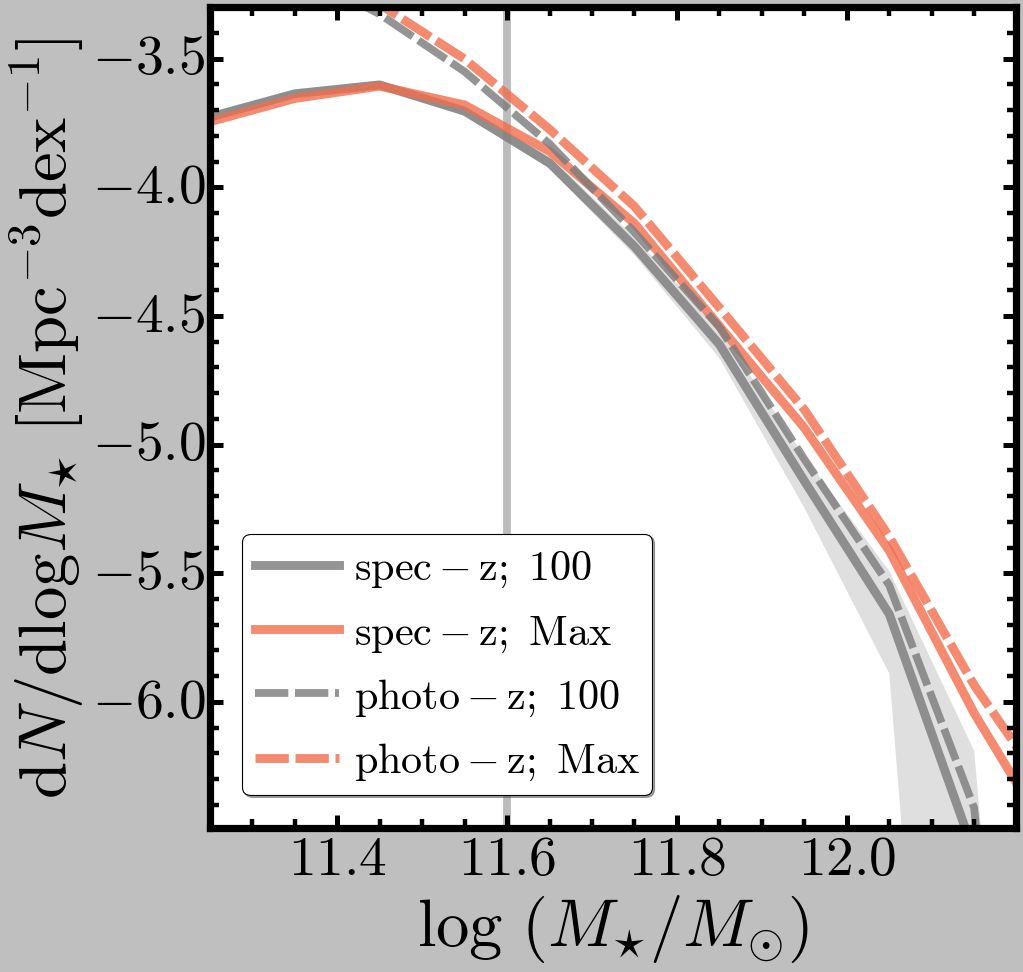

In [15]:
fig = plt.figure(figsize=(13, 12))
fig.subplots_adjust(left=0.22, right=0.995, 
                    bottom=0.14, top=0.995,
                    wspace=0.00, hspace=0.00)

ax1 = fig.add_subplot(111)
ax1 = plotting.songAxisSetup(
    ax1, xlabel=50, ylabel=50, border=6.5,
    xtickFormat='$\mathrm{%4.1f}$', 
    ytickFormat='$\mathrm{%4.1f\ }$')


# S16A
ax1.fill_between(mbin, s16aMLow2, s16aMUpp2, 
                 facecolor=BLK(0.5), 
                 edgecolor='none', alpha=0.3, 
                 zorder=0, rasterized=True)

ax1.plot(mbin, s16aMMed2, c=BLK(0.6), linestyle='-', linewidth=8.0,
         label=r'$\mathrm{spec-z};\ \mathrm{100}$', 
         zorder=2, rasterized=True, alpha=0.8)

ax1.plot(mbin, s16aMMed3, c=ORG(0.6), linestyle='-', linewidth=8.0,
         label=r'$\mathrm{spec-z};\ \mathrm{Max}$', 
         zorder=2, rasterized=True, alpha=0.8)


ax1.plot(mbin, photozMMed2, c=BLK(0.6), linestyle='--', linewidth=7.0,
         label=r'$\mathrm{photo-z};\ \mathrm{100}$', 
         zorder=2, rasterized=True, dashes=(30, 6), alpha=0.8)

ax1.plot(mbin, photozMMed3, c=ORG(0.6), linestyle='--', linewidth=8.0,
         label=r'$\mathrm{photo-z};\ \mathrm{Max}$', 
         zorder=2, rasterized=True, dashes=(30, 6), alpha=0.8)

# Legend
ax1.legend(loc=(0.04, 0.04), shadow=True, fancybox=True, 
           numpoints=1, fontsize=38, scatterpoints=1, 
           markerscale=1.2, borderpad=0.3, handletextpad=0.34)

# X-Y limits
ax1.set_xlim(11.25, 12.199)
ax1.set_ylim(-6.49, -3.3)

# Label
ax1.set_xlabel(r'$\log\ (M_{\star}/M_{\odot})$', 
               size=60)
ax1.set_ylabel(r'$\mathrm{d}N/\mathrm{d}\log M_{\star}\ [{\mathrm{Mpc}^{-3}}{\mathrm{dex}^{-1}}]$', 
               size=60)

ax1.axvline(11.6, linestyle='-', linewidth=7.0, c=BLK(0.4), 
            alpha=0.9, zorder=0, rasterized=True)

fig.savefig(os.path.join(envir['fig'], 
                         's16a_fastlane_pzbright_smf.png'), 
            dpi=100)

plt.show()

# Direct Comparisons of SMF

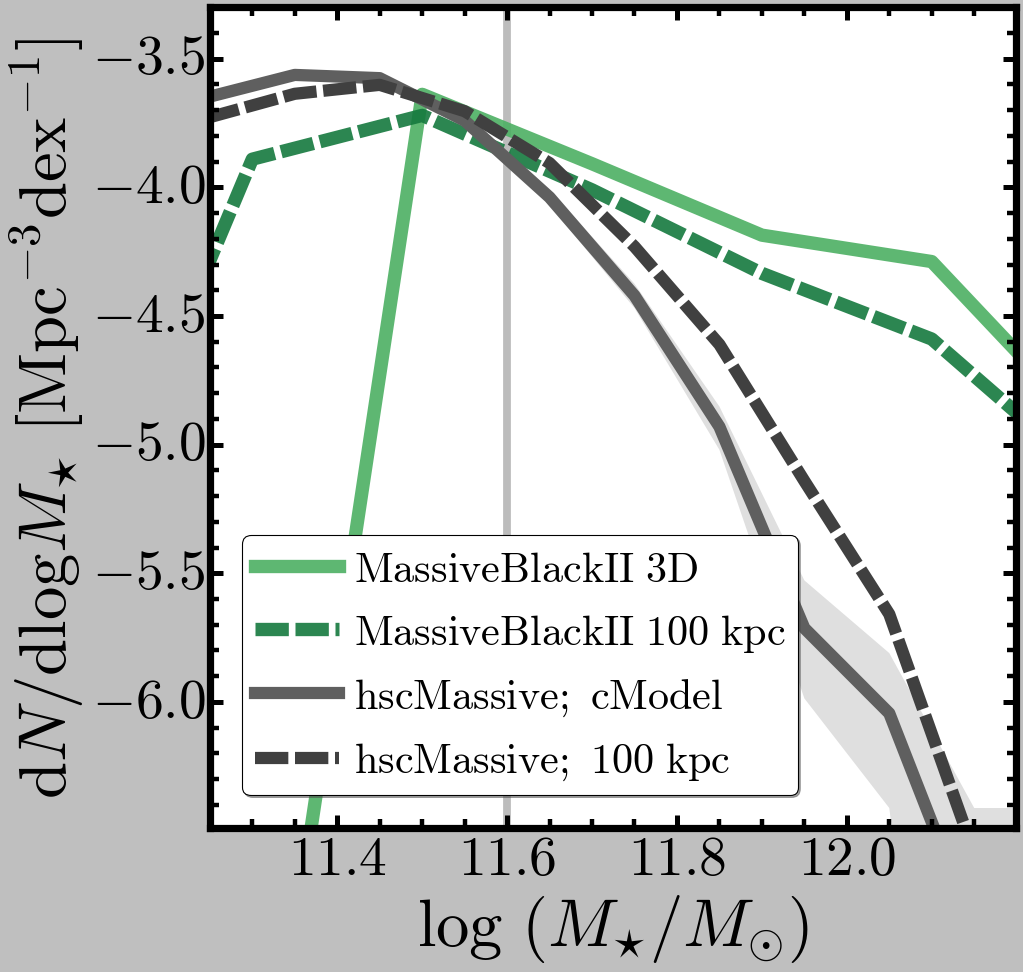

In [35]:
fig = plt.figure(figsize=(13, 12))
fig.subplots_adjust(left=0.22, right=0.995, 
                    bottom=0.14, top=0.995,
                    wspace=0.00, hspace=0.00)

ax1 = fig.add_subplot(111)
ax1 = plotting.songAxisSetup(
    ax1, xlabel=50, ylabel=50, border=6.5,
    xtickFormat='$\mathrm{%4.1f}$', 
    ytickFormat='$\mathrm{%4.1f\ }$')

# Massive Black II
ax1.plot(mbinMblack2, rhoMblack2A, c=GRN(0.6), linestyle='-', 
         linewidth=12.0, zorder=1, alpha=0.9,
         label=r'$\mathrm{MassiveBlackII\ 3D}$', 
         rasterized=True)

# Massive Black II
ax1.plot(mbinMblack2, rhoMblack2B, c=GRN(0.8), linestyle='--', 
         linewidth=12.0, zorder=1, alpha=0.9,
         label=r'$\mathrm{MassiveBlackII\ 100\ kpc}$', 
         rasterized=True, dashes=(30, 6))

# S16A
ax1.fill_between(mbin, s16aMLow1, s16aMUpp1, 
                 facecolor=BLK(0.5), 
                 edgecolor='none', alpha=0.3, 
                 zorder=0, rasterized=True)

ax1.plot(mbin, s16aMMed1, c=BLK(0.7), linestyle='-', linewidth=11.0,
         label=r'$\mathrm{hscMassive};\ \mathrm{cModel}$', 
         zorder=2, rasterized=True)

ax1.plot(mbin, s16aMMed2, c=BLK(0.8), linestyle='--', linewidth=11.0,
         label=r'$\mathrm{hscMassive};\ \mathrm{100\ kpc}$', 
         zorder=2, rasterized=True, dashes=(30, 6))

# Legend
ax1.legend(loc=(0.04, 0.04), shadow=True, fancybox=True, 
           numpoints=1, fontsize=38, scatterpoints=1, 
           markerscale=1.2, borderpad=0.3, handletextpad=0.34)

# X-Y limits
ax1.set_xlim(11.25, 12.199)
ax1.set_ylim(-6.49, -3.3)

# Label
ax1.set_xlabel(r'$\log\ (M_{\star}/M_{\odot})$', 
               size=60)
ax1.set_ylabel(r'$\mathrm{d}N/\mathrm{d}\log M_{\star}\ [{\mathrm{Mpc}^{-3}}{\mathrm{dex}^{-1}}]$', 
               size=60)

ax1.axvline(11.6, linestyle='-', linewidth=7.0, c=BLK(0.4), 
            alpha=0.9, zorder=0, rasterized=True)

fig.savefig(os.path.join(envir['fig'], 
                         's16a_fastlane_smf_mblack2.png'), 
            dpi=100)

plt.show()

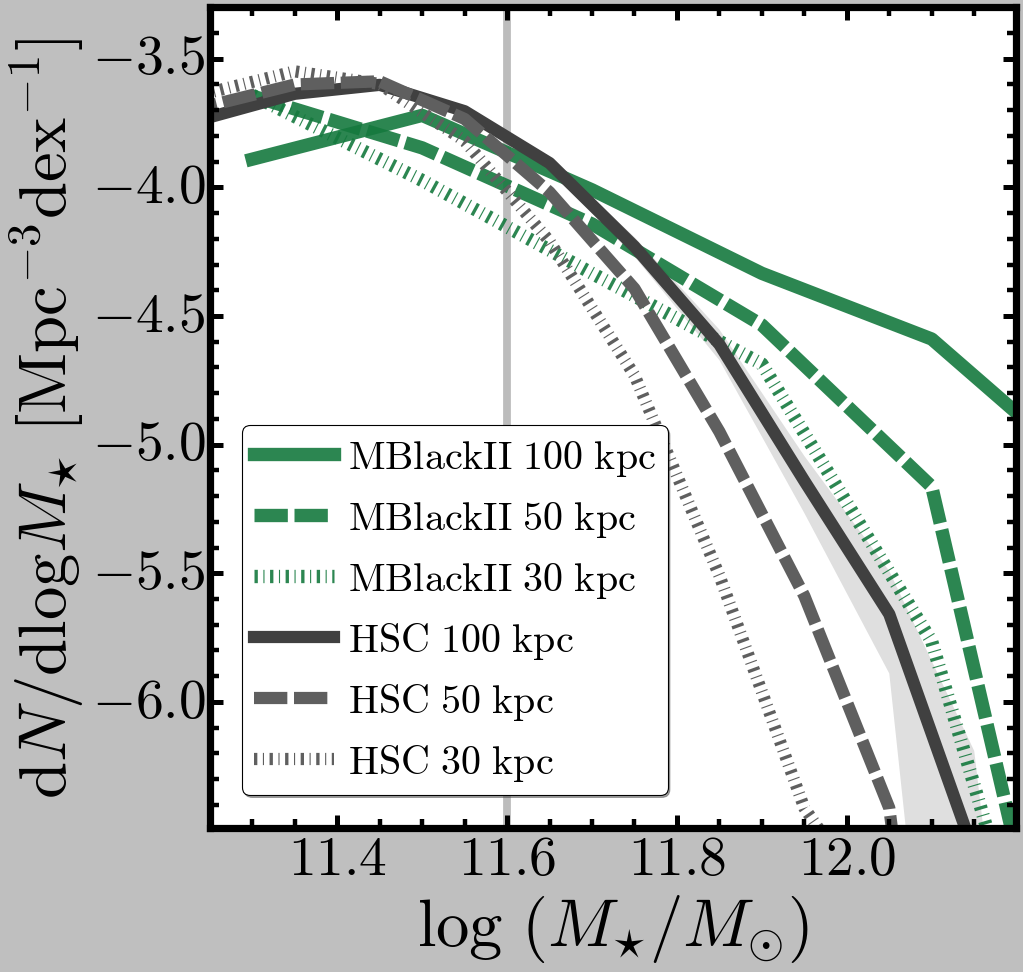

In [36]:
fig = plt.figure(figsize=(13, 12))
fig.subplots_adjust(left=0.22, right=0.995, 
                    bottom=0.14, top=0.995,
                    wspace=0.00, hspace=0.00)

ax1 = fig.add_subplot(111)
ax1 = plotting.songAxisSetup(
    ax1, xlabel=50, ylabel=50, border=6.5,
    xtickFormat='$\mathrm{%4.1f}$', 
    ytickFormat='$\mathrm{%4.1f\ }$')

# Massive Black II - 100 kpc
ax1.plot(mbinMblack2[4:], rhoMblack2B[4:], c=GRN(0.8), linestyle='-', 
         linewidth=12.0, zorder=1, alpha=0.9,
         label=r'$\mathrm{MBlackII\ 100\ kpc}$', 
         rasterized=True)

# Massive Black II - 50 kpc
ax1.plot(mbinMblack2[4:], rhoMblack2C[4:], c=GRN(0.8), linestyle='--', 
         linewidth=12.0, zorder=1, alpha=0.9,
         label=r'$\mathrm{MBlackII\ 50\ kpc}$', 
         rasterized=True, dashes=(30, 6))

# Massive Black II - 30 kpc
ax1.plot(mbinMblack2[4:], rhoMblack2D[4:], c=GRN(0.8), linestyle='-.', 
         linewidth=12.0, zorder=1, alpha=0.9,
         label=r'$\mathrm{MBlackII\ 30\ kpc}$', 
         rasterized=True)


# S16A
ax1.fill_between(mbin, s16aMLow2, s16aMUpp2, 
                 facecolor=BLK(0.5), 
                 edgecolor='none', alpha=0.3, 
                 zorder=0, rasterized=True)

ax1.plot(mbin, s16aMMed2, c=BLK(0.8), linestyle='-', linewidth=11.0,
         label=r'$\mathrm{HSC}\ \mathrm{100\ kpc}$', 
         zorder=2, rasterized=True)

ax1.plot(mbin, s16aMMed6, c=BLK(0.7), linestyle='--', linewidth=11.0,
         label=r'$\mathrm{HSC}\ \mathrm{50\ kpc}$', 
         zorder=2, rasterized=True, dashes=(30, 6))

ax1.plot(mbin, s16aMMed5, c=BLK(0.7), linestyle='-.', linewidth=11.0,
         label=r'$\mathrm{HSC}\ \mathrm{30\ kpc}$', 
         zorder=2, rasterized=True)


# Legend
ax1.legend(loc=(0.04, 0.04), shadow=True, fancybox=True, 
           numpoints=1, fontsize=36, scatterpoints=1, 
           markerscale=1.2, borderpad=0.3, handletextpad=0.34)

# X-Y limits
ax1.set_xlim(11.25, 12.199)
ax1.set_ylim(-6.49, -3.3)

# Label
ax1.set_xlabel(r'$\log\ (M_{\star}/M_{\odot})$', 
               size=60)
ax1.set_ylabel(r'$\mathrm{d}N/\mathrm{d}\log M_{\star}\ [{\mathrm{Mpc}^{-3}}{\mathrm{dex}^{-1}}]$', 
               size=60)

ax1.axvline(11.6, linestyle='-', linewidth=7.0, c=BLK(0.4), 
            alpha=0.9, zorder=0, rasterized=True)

fig.savefig(os.path.join(envir['fig'], 
                         's16a_fastlane_smf_simulation_1.png'), 
            dpi=100)

plt.show()

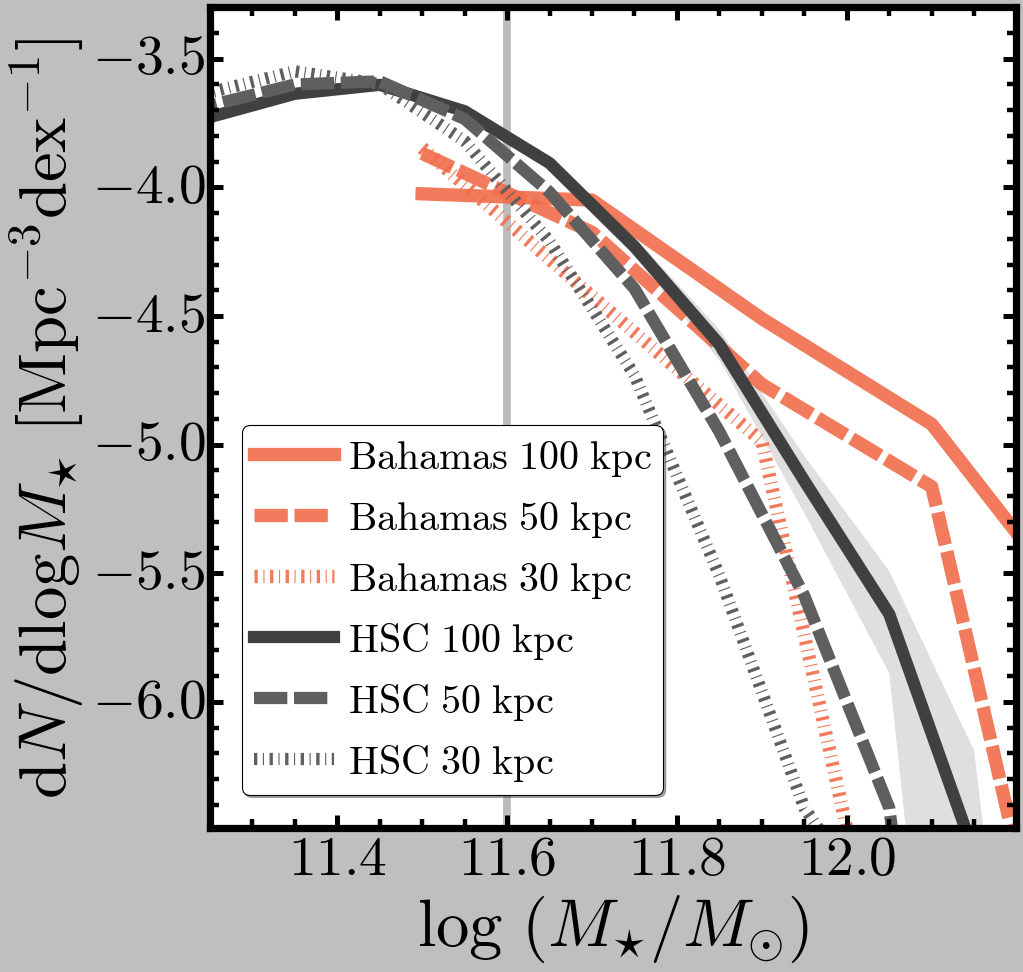

In [37]:
fig = plt.figure(figsize=(13, 12))
fig.subplots_adjust(left=0.22, right=0.995, 
                    bottom=0.14, top=0.995,
                    wspace=0.00, hspace=0.00)

ax1 = fig.add_subplot(111)
ax1 = plotting.songAxisSetup(
    ax1, xlabel=50, ylabel=50, border=6.5,
    xtickFormat='$\mathrm{%4.1f}$', 
    ytickFormat='$\mathrm{%4.1f\ }$')

# Bahamas - 100 kpc
ax1.plot(mbinBahamas[5:], rhoBahamasB[5:], c=ORG(0.6), linestyle='-', 
         linewidth=12.0, zorder=1, alpha=0.9,
         label=r'$\mathrm{Bahamas\ 100\ kpc}$', 
         rasterized=True)

# Bahamas - 50 kpc
ax1.plot(mbinBahamas[5:], rhoBahamasC[5:], c=ORG(0.6), linestyle='--', 
         linewidth=12.0, zorder=1, alpha=0.9,
         label=r'$\mathrm{Bahamas\ 50\ kpc}$', 
         rasterized=True, dashes=(30, 6))

# Bahamas - 30 kpc
ax1.plot(mbinBahamas[5:], rhoBahamasD[5:], c=ORG(0.6), linestyle='-.', 
         linewidth=12.0, zorder=1, alpha=0.9,
         label=r'$\mathrm{Bahamas\ 30\ kpc}$', 
         rasterized=True)


# S16A
ax1.fill_between(mbin, s16aMLow2, s16aMUpp2, 
                 facecolor=BLK(0.5), 
                 edgecolor='none', alpha=0.3, 
                 zorder=0, rasterized=True)

ax1.plot(mbin, s16aMMed2, c=BLK(0.8), linestyle='-', linewidth=11.0,
         label=r'$\mathrm{HSC}\ \mathrm{100\ kpc}$', 
         zorder=2, rasterized=True)

ax1.plot(mbin, s16aMMed6, c=BLK(0.7), linestyle='--', linewidth=11.0,
         label=r'$\mathrm{HSC}\ \mathrm{50\ kpc}$', 
         zorder=2, rasterized=True, dashes=(30, 6))

ax1.plot(mbin, s16aMMed5, c=BLK(0.7), linestyle='-.', linewidth=11.0,
         label=r'$\mathrm{HSC}\ \mathrm{30\ kpc}$', 
         zorder=2, rasterized=True)


# Legend
ax1.legend(loc=(0.04, 0.04), shadow=True, fancybox=True, 
           numpoints=1, fontsize=36, scatterpoints=1, 
           markerscale=1.2, borderpad=0.3, handletextpad=0.34)

# X-Y limits
ax1.set_xlim(11.25, 12.199)
ax1.set_ylim(-6.49, -3.3)

# Label
ax1.set_xlabel(r'$\log\ (M_{\star}/M_{\odot})$', 
               size=60)
ax1.set_ylabel(r'$\mathrm{d}N/\mathrm{d}\log M_{\star}\ [{\mathrm{Mpc}^{-3}}{\mathrm{dex}^{-1}}]$', 
               size=60)

ax1.axvline(11.6, linestyle='-', linewidth=7.0, c=BLK(0.4), 
            alpha=0.9, zorder=0, rasterized=True)

fig.savefig(os.path.join(envir['fig'], 
                         's16a_fastlane_smf_simulation_2.png'), 
            dpi=100)

plt.show()

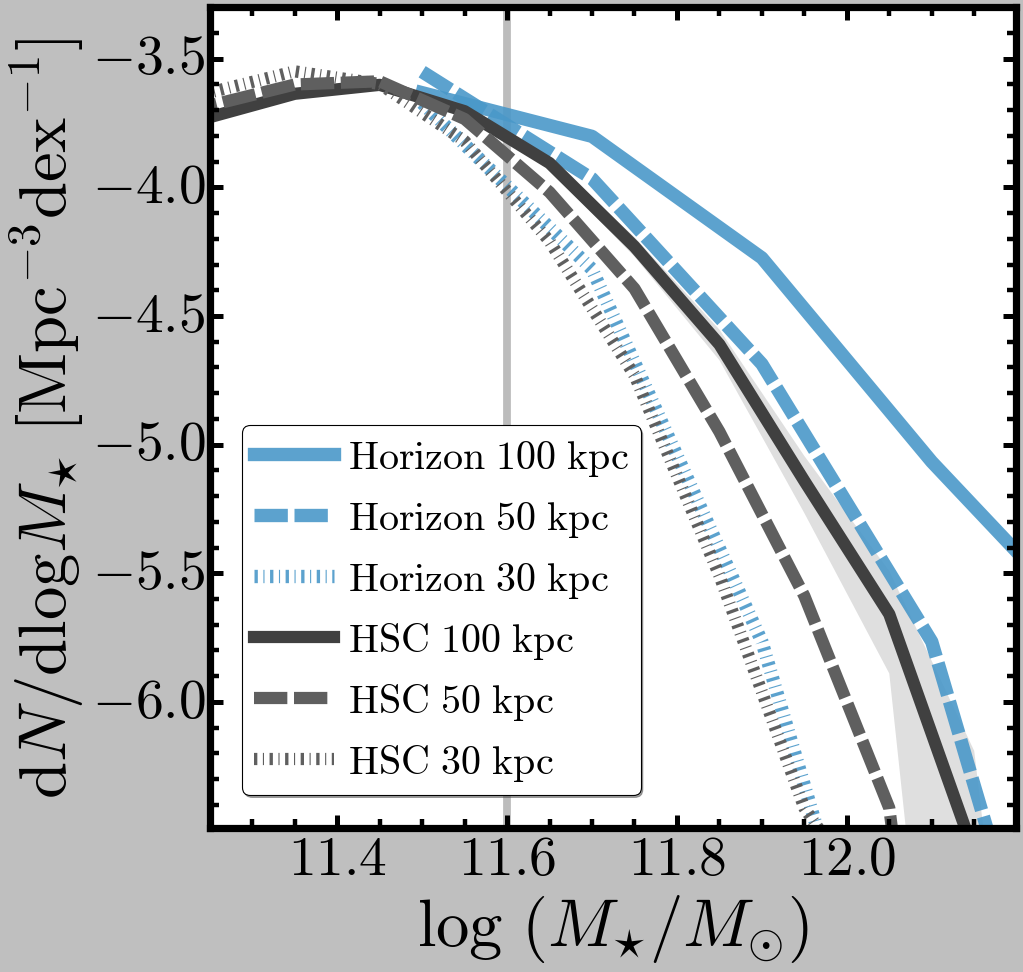

In [38]:
fig = plt.figure(figsize=(13, 12))
fig.subplots_adjust(left=0.22, right=0.995, 
                    bottom=0.14, top=0.995,
                    wspace=0.00, hspace=0.00)

ax1 = fig.add_subplot(111)
ax1 = plotting.songAxisSetup(
    ax1, xlabel=50, ylabel=50, border=6.5,
    xtickFormat='$\mathrm{%4.1f}$', 
    ytickFormat='$\mathrm{%4.1f\ }$')

# Horizon - 100 kpc
ax1.plot(mbinHorizon[5:], rhoHorizonB[5:], c=BLU(0.6), linestyle='-', 
         linewidth=12.0, zorder=1, alpha=0.9,
         label=r'$\mathrm{Horizon\ 100\ kpc}$', 
         rasterized=True)

# Horizon - 50 kpc
ax1.plot(mbinHorizon[5:], rhoHorizonC[5:], c=BLU(0.6), linestyle='--', 
         linewidth=12.0, zorder=1, alpha=0.9,
         label=r'$\mathrm{Horizon\ 50\ kpc}$', 
         rasterized=True, dashes=(30, 6))

# Horizon - 30 kpc
ax1.plot(mbinHorizon[5:], rhoHorizonD[5:], c=BLU(0.6), linestyle='-.', 
         linewidth=12.0, zorder=1, alpha=0.9,
         label=r'$\mathrm{Horizon\ 30\ kpc}$', 
         rasterized=True)


# S16A
ax1.fill_between(mbin, s16aMLow2, s16aMUpp2, 
                 facecolor=BLK(0.5), 
                 edgecolor='none', alpha=0.3, 
                 zorder=0, rasterized=True)

ax1.plot(mbin, s16aMMed2, c=BLK(0.8), linestyle='-', linewidth=11.0,
         label=r'$\mathrm{HSC}\ \mathrm{100\ kpc}$', 
         zorder=2, rasterized=True)

ax1.plot(mbin, s16aMMed6, c=BLK(0.7), linestyle='--', linewidth=11.0,
         label=r'$\mathrm{HSC}\ \mathrm{50\ kpc}$', 
         zorder=2, rasterized=True, dashes=(30, 6))

ax1.plot(mbin, s16aMMed5, c=BLK(0.7), linestyle='-.', linewidth=11.0,
         label=r'$\mathrm{HSC}\ \mathrm{30\ kpc}$', 
         zorder=2, rasterized=True)


# Legend
ax1.legend(loc=(0.04, 0.04), shadow=True, fancybox=True, 
           numpoints=1, fontsize=36, scatterpoints=1, 
           markerscale=1.2, borderpad=0.3, handletextpad=0.34)

# X-Y limits
ax1.set_xlim(11.25, 12.199)
ax1.set_ylim(-6.49, -3.3)

# Label
ax1.set_xlabel(r'$\log\ (M_{\star}/M_{\odot})$', 
               size=60)
ax1.set_ylabel(r'$\mathrm{d}N/\mathrm{d}\log M_{\star}\ [{\mathrm{Mpc}^{-3}}{\mathrm{dex}^{-1}}]$', 
               size=60)

ax1.axvline(11.6, linestyle='-', linewidth=7.0, c=BLK(0.4), 
            alpha=0.9, zorder=0, rasterized=True)

fig.savefig(os.path.join(envir['fig'], 
                         's16a_fastlane_smf_simulation_3.png'), 
            dpi=100)

plt.show()

# Comparisons of normalized SMF

## Separated by Simulation

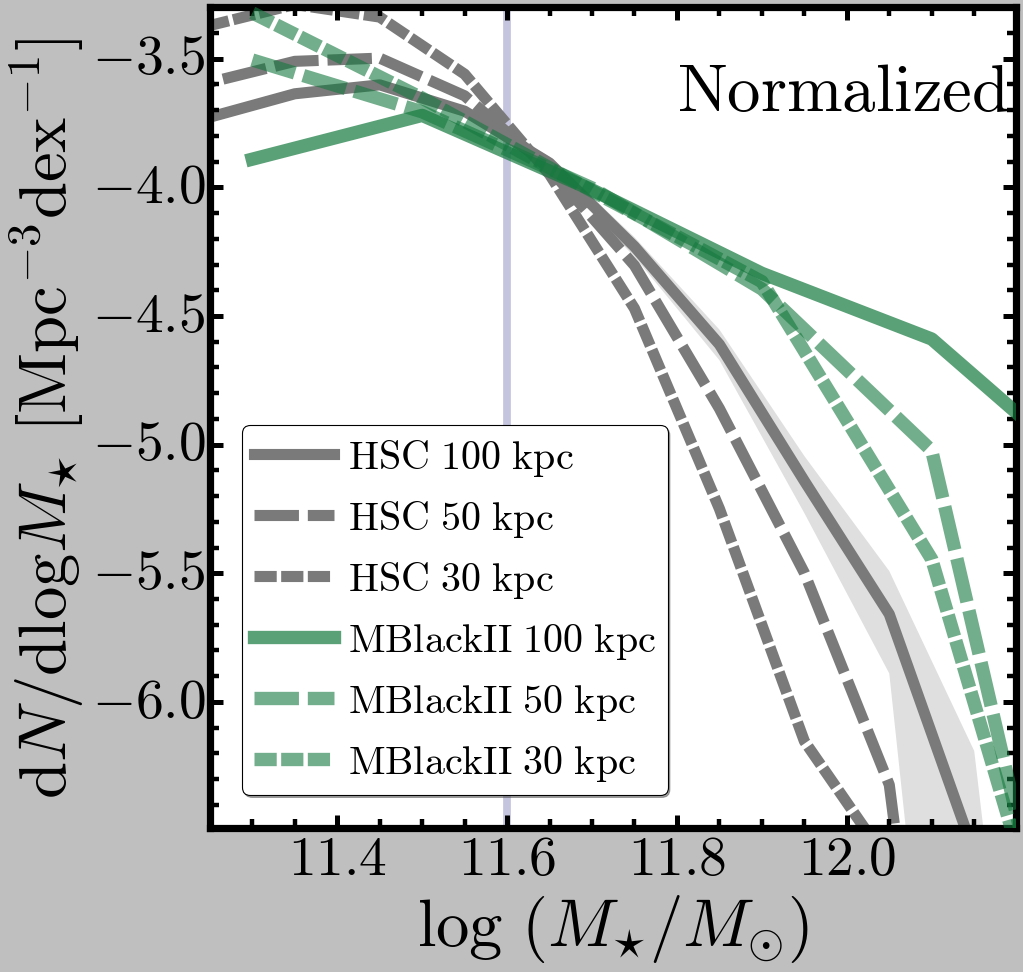

In [39]:
fig = plt.figure(figsize=(13, 12))
fig.subplots_adjust(left=0.22, right=0.995, 
                    bottom=0.14, top=0.995,
                    wspace=0.00, hspace=0.00)

ax1 = fig.add_subplot(111)
ax1 = plotting.songAxisSetup(
    ax1, xlabel=50, ylabel=50, border=6.5,
    xtickFormat='$\mathrm{%4.1f}$', 
    ytickFormat='$\mathrm{%4.1f\ }$')


# S16A
ax1.fill_between(mbin, s16aMLow2, s16aMUpp2, 
                 facecolor=BLK(0.5), 
                 edgecolor='none', alpha=0.3, 
                 zorder=0, rasterized=True)

ax1.plot(mbin, s16aMMed2, c=BLK(0.6), linestyle='-', linewidth=10.0,
         label=r'$\mathrm{HSC}\ \mathrm{100\ kpc}$', 
         zorder=2, rasterized=True)

ax1.plot(mbin, s16aMMed6 + 0.09, c=BLK(0.6), linestyle='--', linewidth=10.0,
         label=r'$\mathrm{HSC}\ \mathrm{50\ kpc}$', 
         zorder=2, rasterized=True, dashes=(40, 8))

ax1.plot(mbin, s16aMMed5 + 0.26, c=BLK(0.6), linestyle='--', linewidth=10.0,
         label=r'$\mathrm{HSC}\ \mathrm{30\ kpc}$', 
         zorder=2, rasterized=True, dashes=(20, 4))

# Massive Black II - 100 kpc
ax1.plot(mbinMblack2[4:], rhoMblack2B[4:], c=GRN(0.8), linestyle='-', 
         linewidth=12.0, zorder=5, alpha=0.7,
         label=r'$\mathrm{MBlackII\ 100\ kpc}$', 
         rasterized=True)

# Massive Black II - 50 kpc
ax1.plot(mbinMblack2[4:], rhoMblack2C[4:] + 0.14, c=GRN(0.8), linestyle='--', 
         linewidth=12.0, zorder=5, alpha=0.6,
         label=r'$\mathrm{MBlackII\ 50\ kpc}$', 
         rasterized=True, dashes=(40, 8))

# Massive Black II - 30 kpc
ax1.plot(mbinMblack2[4:], rhoMblack2D[4:] + 0.32, c=GRN(0.8), linestyle='--', 
         linewidth=12.0, zorder=5, alpha=0.6,
         label=r'$\mathrm{MBlackII\ 30\ kpc}$', 
         rasterized=True, dashes=(20, 4))


# Legend
ax1.legend(loc=(0.04, 0.04), shadow=True, fancybox=True, 
           numpoints=1, fontsize=36, scatterpoints=1, 
           markerscale=1.2, borderpad=0.3, handletextpad=0.34)

# X-Y limits
ax1.set_xlim(11.25, 12.199)
ax1.set_ylim(-6.49, -3.3)

# Label
ax1.set_xlabel(r'$\log\ (M_{\star}/M_{\odot})$', 
               size=60)
ax1.set_ylabel(r'$\mathrm{d}N/\mathrm{d}\log M_{\star}\ [{\mathrm{Mpc}^{-3}}{\mathrm{dex}^{-1}}]$', 
               size=60)

ax1.text(11.8, -3.7, r'$\mathrm{Normalized}$', size=60)

ax1.axvline(11.6, linestyle='-', linewidth=7.0, c=PUR(0.4), 
            alpha=0.8, zorder=0, rasterized=True)
#ax1.axvline(11.7, linestyle='-', linewidth=4.0, c=PUR(0.5), 
#            alpha=0.8, zorder=0, rasterized=True)

fig.savefig(os.path.join(envir['fig'], 
                         's16a_fastlane_smf_simulation_4.png'), 
            dpi=100)

plt.show()

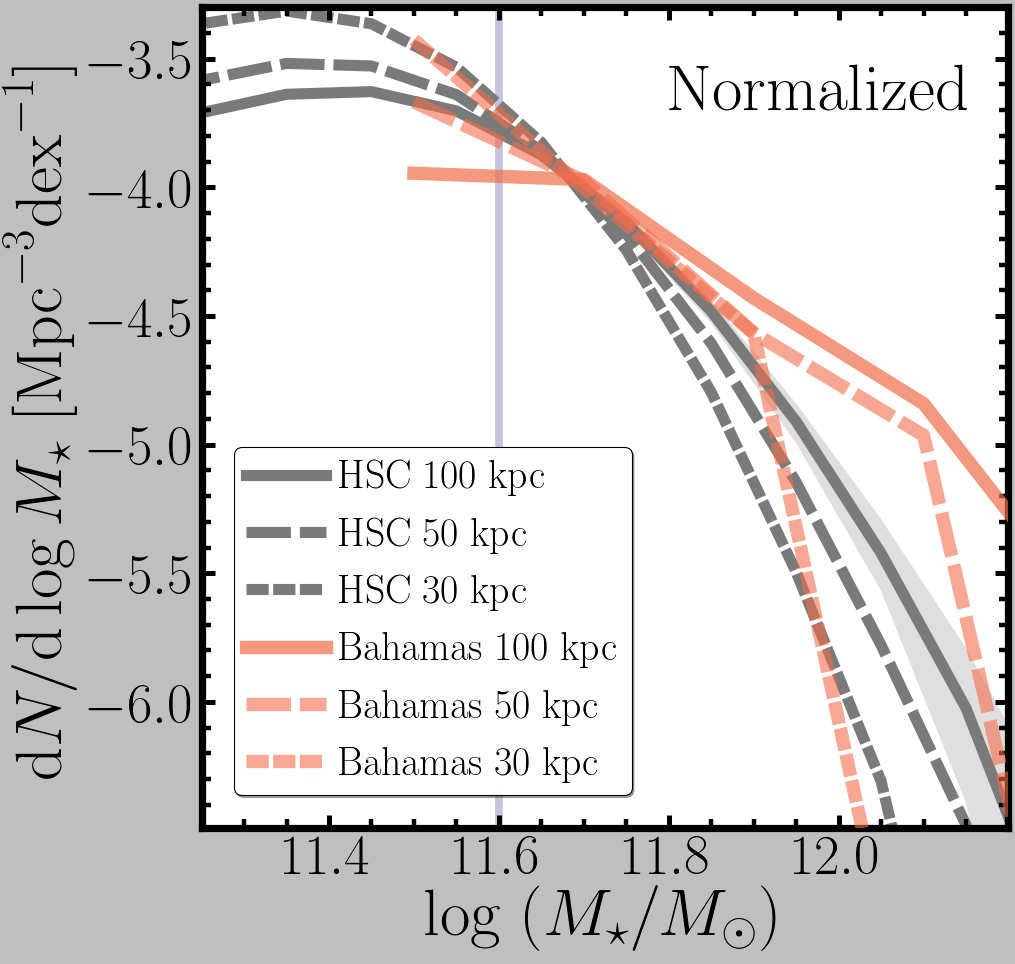

In [47]:
fig = plt.figure(figsize=(13, 12))
fig.subplots_adjust(left=0.22, right=0.995, 
                    bottom=0.14, top=0.995,
                    wspace=0.00, hspace=0.00)

ax1 = fig.add_subplot(111)
ax1 = plotting.songAxisSetup(
    ax1, xlabel=50, ylabel=50, border=6.5,
    xtickFormat='$\mathrm{%4.1f}$', 
    ytickFormat='$\mathrm{%4.1f\ }$')

# S16A
ax1.fill_between(mbin, s16aMLow2, s16aMUpp2, 
                 facecolor=BLK(0.5), 
                 edgecolor='none', alpha=0.3, 
                 zorder=0, rasterized=True)

ax1.plot(mbin, s16aMMed2, c=BLK(0.6), linestyle='-', linewidth=10.0,
         label=r'$\mathrm{HSC}\ \mathrm{100\ kpc}$', 
         zorder=2, rasterized=True)

ax1.plot(mbin, s16aMMed6 + 0.09, c=BLK(0.6), linestyle='--', linewidth=10.0,
         label=r'$\mathrm{HSC}\ \mathrm{50\ kpc}$', 
         zorder=2, rasterized=True, dashes=(40, 8))

ax1.plot(mbin, s16aMMed5 + 0.26, c=BLK(0.6), linestyle='--', linewidth=10.0,
         label=r'$\mathrm{HSC}\ \mathrm{30\ kpc}$', 
         zorder=2, rasterized=True, dashes=(20, 4))

# Bahamas - 100 kpc
ax1.plot(mbinBahamas[5:], rhoBahamasB[5:] + 0.08, c=ORG(0.6), linestyle='-', 
         linewidth=12.0, zorder=5, alpha=0.7,
         label=r'$\mathrm{Bahamas\ 100\ kpc}$', 
         rasterized=True)

# Bahamas - 50 kpc
ax1.plot(mbinBahamas[5:], rhoBahamasC[5:] + 0.20, c=ORG(0.6), linestyle='--', 
         linewidth=12.0, zorder=5, alpha=0.6,
         label=r'$\mathrm{Bahamas\ 50\ kpc}$', 
         rasterized=True, dashes=(40, 8))

# Bahamas - 30 kpc
ax1.plot(mbinBahamas[5:], rhoBahamasD[5:] + 0.42, c=ORG(0.6), linestyle='--', 
         linewidth=12.0, zorder=5, alpha=0.6,
         label=r'$\mathrm{Bahamas\ 30\ kpc}$', 
         rasterized=True, dashes=(20, 4))

# Legend
ax1.legend(loc=(0.04, 0.04), shadow=True, fancybox=True, 
           numpoints=1, fontsize=36, scatterpoints=1, 
           markerscale=1.2, borderpad=0.3, handletextpad=0.34)

# X-Y limits
ax1.set_xlim(11.25, 12.199)
ax1.set_ylim(-6.49, -3.3)

# Label
ax1.set_xlabel(r'$\log\ (M_{\star}/M_{\odot})$', 
               size=60)
ax1.set_ylabel(r'$\mathrm{d}N/\mathrm{d}\log M_{\star}\ [{\mathrm{Mpc}^{-3}}{\mathrm{dex}^{-1}}]$', 
               size=60)

ax1.text(11.8, -3.7, r'$\mathrm{Normalized}$', size=60)

ax1.axvline(11.6, linestyle='-', linewidth=7.0, c=PUR(0.4), 
            alpha=0.8, zorder=0, rasterized=True)

fig.savefig(os.path.join(envir['fig'], 
                         's16a_fastlane_smf_simulation_5.png'), 
            dpi=100)

plt.show()

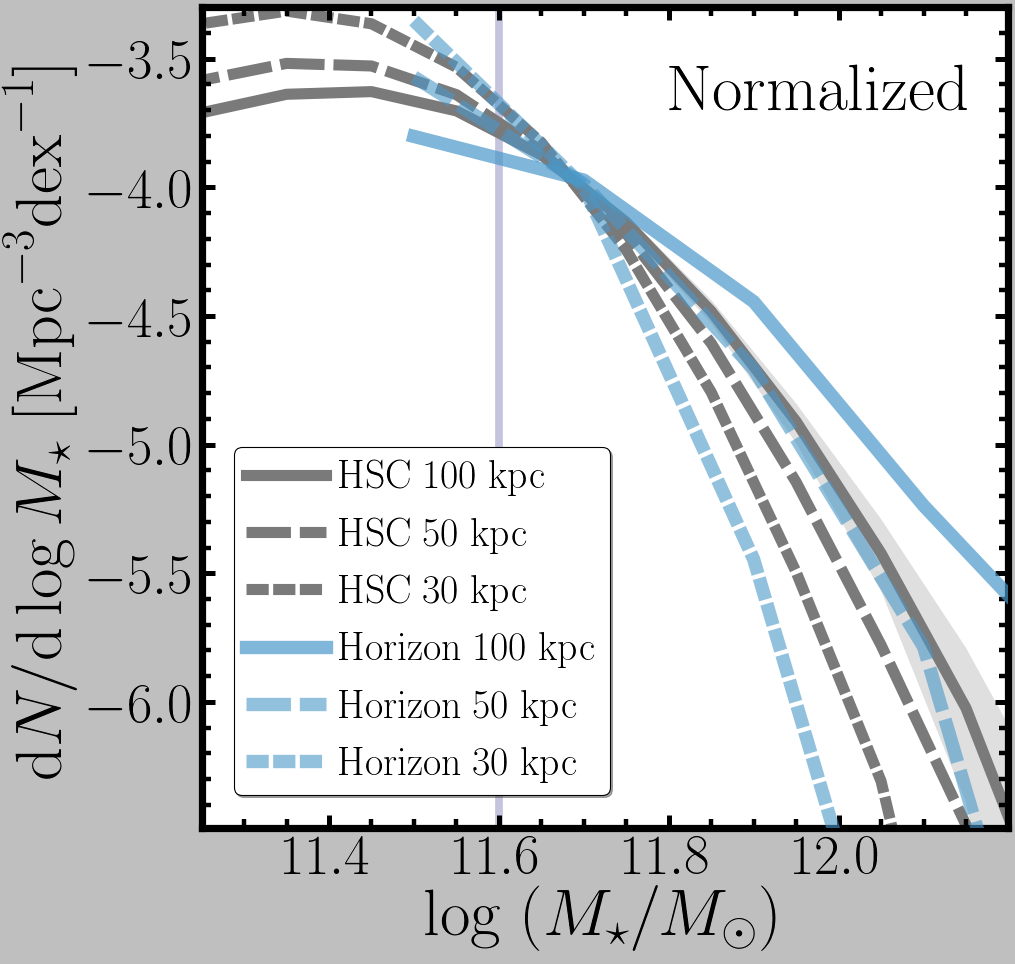

In [45]:
fig = plt.figure(figsize=(13, 12))
fig.subplots_adjust(left=0.22, right=0.995, 
                    bottom=0.14, top=0.995,
                    wspace=0.00, hspace=0.00)

ax1 = fig.add_subplot(111)
ax1 = plotting.songAxisSetup(
    ax1, xlabel=50, ylabel=50, border=6.5,
    xtickFormat='$\mathrm{%4.1f}$', 
    ytickFormat='$\mathrm{%4.1f\ }$')

# S16A
ax1.fill_between(mbin, s16aMLow2, s16aMUpp2, 
                 facecolor=BLK(0.5), 
                 edgecolor='none', alpha=0.3, 
                 zorder=0, rasterized=True)

ax1.plot(mbin, s16aMMed2, c=BLK(0.6), linestyle='-', linewidth=10.0,
         label=r'$\mathrm{HSC}\ \mathrm{100\ kpc}$', 
         zorder=2, rasterized=True)

ax1.plot(mbin, s16aMMed6 + 0.09, c=BLK(0.6), linestyle='--', linewidth=10.0,
         label=r'$\mathrm{HSC}\ \mathrm{50\ kpc}$', 
         zorder=2, rasterized=True, dashes=(40, 8))

ax1.plot(mbin, s16aMMed5 + 0.26, c=BLK(0.6), linestyle='--', linewidth=10.0,
         label=r'$\mathrm{HSC}\ \mathrm{30\ kpc}$', 
         zorder=2, rasterized=True, dashes=(20, 4))

# Horizon - 100 kpc
ax1.plot(mbinHorizon[5:], rhoHorizonB[5:] - 0.17, c=BLU(0.6), linestyle='-', 
         linewidth=12.0, zorder=5, alpha=0.7,
         label=r'$\mathrm{Horizon\ 100\ kpc}$', 
         rasterized=True)

# Horizon - 50 kpc
ax1.plot(mbinHorizon[5:], rhoHorizonC[5:] - 0.02, c=BLU(0.6), linestyle='--', 
         linewidth=12.0, zorder=5, alpha=0.6,
         label=r'$\mathrm{Horizon\ 50\ kpc}$', 
         rasterized=True, dashes=(40, 8))

# Horizon - 30 kpc
ax1.plot(mbinHorizon[5:], rhoHorizonD[5:] + 0.32, c=BLU(0.6), linestyle='--', 
         linewidth=12.0, zorder=5, alpha=0.6,
         label=r'$\mathrm{Horizon\ 30\ kpc}$', 
         rasterized=True, dashes=(20, 4))

# Legend
ax1.legend(loc=(0.04, 0.04), shadow=True, fancybox=True, 
           numpoints=1, fontsize=36, scatterpoints=1, 
           markerscale=1.2, borderpad=0.3, handletextpad=0.34)

# X-Y limits
ax1.set_xlim(11.25, 12.199)
ax1.set_ylim(-6.49, -3.3)

# Label
ax1.set_xlabel(r'$\log\ (M_{\star}/M_{\odot})$', 
               size=60)
ax1.set_ylabel(r'$\mathrm{d}N/\mathrm{d}\log M_{\star}\ [{\mathrm{Mpc}^{-3}}{\mathrm{dex}^{-1}}]$', 
               size=60)

ax1.text(11.8, -3.7, r'$\mathrm{Normalized}$', size=60)

ax1.axvline(11.6, linestyle='-', linewidth=7.0, c=PUR(0.4), 
            alpha=0.8, zorder=0, rasterized=True)

fig.savefig(os.path.join(envir['fig'], 
                         's16a_fastlane_smf_simulation_6.png'), 
            dpi=100)

plt.show()

# Separated by radius

In [35]:
volMBlack2 = (SMBLACK2 / HSMALL) ** 3.0 * 0.85  # Mpc**3
volBahamas = (SMBLACK2 / HSMALL) ** 3.0 * 0.7 # Mpc**3
volHorizon = (SHORIZON / HSMALL) ** 3.0 * 0.9  # Mpc**3

# MassiveBlack-II
rhoMblack2A = mass_function.singleMassFunction(
    mblack2['logmstar'], volMBlack2, bins=11, binSize=0.2,
    massLow=10.4)

rhoMblack2B = mass_function.singleMassFunction(
    mblack2['m100_aper'], volMBlack2, bins=11, binSize=0.2,
    massLow=10.4)

rhoMblack2C = mass_function.singleMassFunction(
    mblack2['m50_aper'], volMBlack2, bins=11, binSize=0.2,
    massLow=10.4)

rhoMblack2D = mass_function.singleMassFunction(
    mblack2['m30_aper'], volMBlack2, bins=11, binSize=0.2,
    massLow=10.4)

mbinMblack2 = (np.linspace(10.4, 12.6, 12) + 0.1)[:-1]

# Bahamas
rhoBahamasA = mass_function.singleMassFunction(
    bahamas['logM100_3D'], volBahamas, bins=11, binSize=0.2,
    massLow=10.4)

rhoBahamasB = mass_function.singleMassFunction(
    bahamas['m100_aper'], volBahamas, bins=11, binSize=0.2,
    massLow=10.4)

rhoBahamasC = mass_function.singleMassFunction(
    bahamas['m50_aper'], volBahamas, bins=11, binSize=0.2,
    massLow=10.4)

rhoBahamasD = mass_function.singleMassFunction(
    bahamas['m30_aper'], volBahamas, bins=11, binSize=0.2,
    massLow=10.4)

mbinBahamas = (np.linspace(10.4, 12.6, 12) + 0.1)[:-1]

# Horizon
rhoHorizonA = mass_function.singleMassFunction(
    horizon['logm_3d'], volHorizon, bins=11, binSize=0.2,
    massLow=10.4)

rhoHorizonB = mass_function.singleMassFunction(
    horizon['m100_aper'], volHorizon, bins=11, binSize=0.2,
    massLow=10.4)

rhoHorizonC = mass_function.singleMassFunction(
    horizon['m50_aper'], volHorizon, bins=11, binSize=0.2,
    massLow=10.4)

rhoHorizonD = mass_function.singleMassFunction(
    horizon['m30_aper'], volHorizon, bins=11, binSize=0.2,
    massLow=10.4)

mbinHorizon = (np.linspace(10.4, 12.6, 12) + 0.1)[:-1]

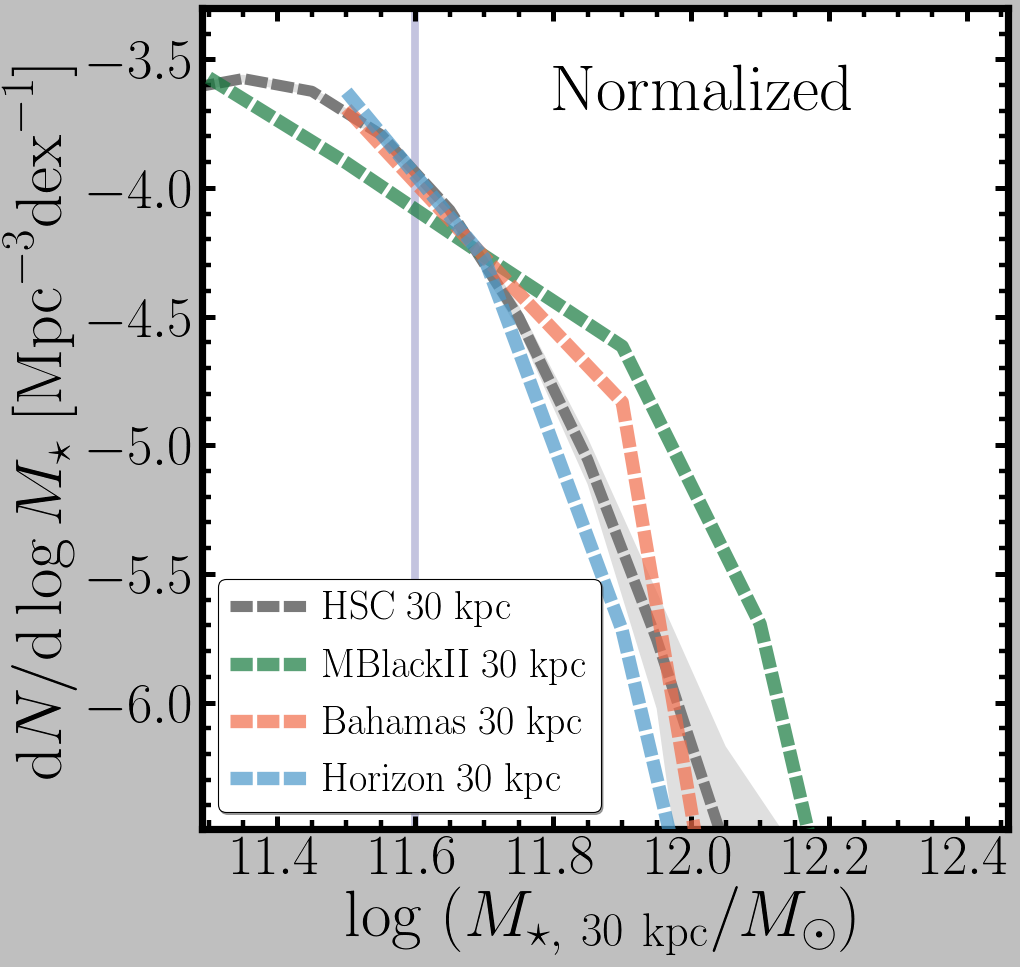

In [51]:
fig = plt.figure(figsize=(13, 12))
fig.subplots_adjust(left=0.22, right=0.995, 
                    bottom=0.14, top=0.995,
                    wspace=0.00, hspace=0.00)

ax1 = fig.add_subplot(111)
ax1 = plotting.songAxisSetup(
    ax1, xlabel=50, ylabel=50, border=6.5,
    xtickFormat='$\mathrm{%4.1f}$', 
    ytickFormat='$\mathrm{%4.1f\ }$')


# S16A
ax1.fill_between(mbin, s16aMLow5, s16aMUpp5, 
                 facecolor=BLK(0.5), 
                 edgecolor='none', alpha=0.3, 
                 zorder=0, rasterized=True)

ax1.plot(mbin, s16aMMed5, c=BLK(0.6), linestyle='--', linewidth=10.0,
         label=r'$\mathrm{HSC}\ \mathrm{30\ kpc}$', 
         zorder=2, rasterized=True, dashes=(20, 4))

# Massive Black II - 100 kpc
ax1.plot(mbinMblack2[4:], rhoMblack2D[4:], c=GRN(0.8), linestyle='--', 
         linewidth=12.0, zorder=5, alpha=0.7,
         label=r'$\mathrm{MBlackII\ 30\ kpc}$', 
         rasterized=True, dashes=(20,4))

# Bahamas - 100 kpc
ax1.plot(mbinBahamas[5:], rhoBahamasD[5:], c=ORG(0.6), linestyle='--', 
         linewidth=12.0, zorder=5, alpha=0.7,
         label=r'$\mathrm{Bahamas\ 30\ kpc}$', 
         rasterized=True, dashes=(20,4))

# Horizon - 100 kpc
ax1.plot(mbinHorizon[5:], rhoHorizonD[5:], c=BLU(0.6), linestyle='--', 
         linewidth=12.0, zorder=5, alpha=0.7,
         label=r'$\mathrm{Horizon\ 30\ kpc}$', 
         rasterized=True, dashes=(20,4))

# Legend
ax1.legend(loc=(0.02, 0.02), shadow=True, fancybox=True, 
           numpoints=1, fontsize=36, scatterpoints=1, 
           markerscale=1.2, borderpad=0.3, handletextpad=0.34)

# X-Y limits
ax1.set_xlim(11.29, 12.459)
ax1.set_ylim(-6.49, -3.3)

# Label
ax1.set_xlabel(r'$\log\ (M_{\star,\ 30\ \mathrm{kpc}}/M_{\odot})$', 
               size=60)
ax1.set_ylabel(r'$\mathrm{d}N/\mathrm{d}\log M_{\star}\ [{\mathrm{Mpc}^{-3}}{\mathrm{dex}^{-1}}]$', 
               size=60)

ax1.text(11.8, -3.7, r'$\mathrm{Normalized}$', size=60)

ax1.axvline(11.6, linestyle='-', linewidth=7.0, c=PUR(0.4), 
            alpha=0.8, zorder=0, rasterized=True)
#ax1.axvline(11.7, linestyle='-', linewidth=4.0, c=PUR(0.5), 
#            alpha=0.8, zorder=0, rasterized=True)

fig.savefig(os.path.join(envir['fig'], 
                         's16a_fastlane_smf_simulation_9.png'), 
            dpi=100)

plt.show()

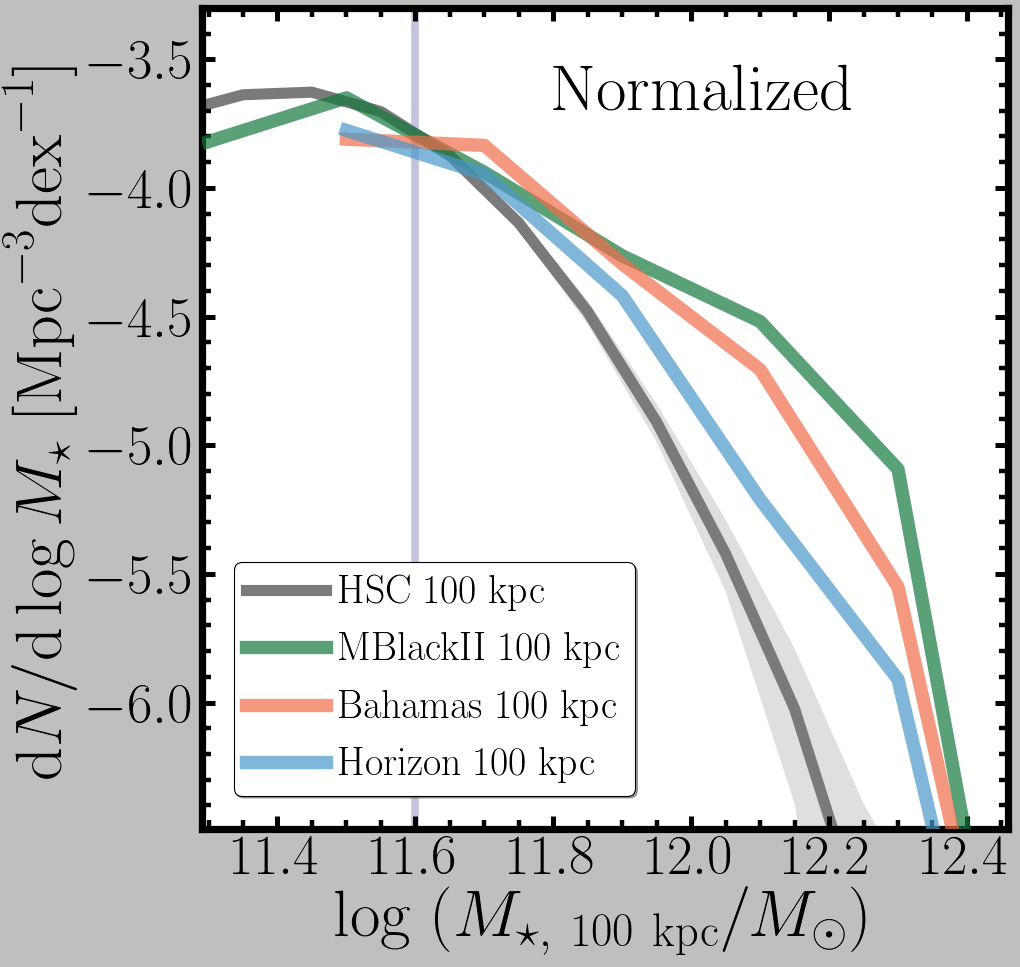

In [47]:
fig = plt.figure(figsize=(13, 12))
fig.subplots_adjust(left=0.22, right=0.995, 
                    bottom=0.14, top=0.995,
                    wspace=0.00, hspace=0.00)

ax1 = fig.add_subplot(111)
ax1 = plotting.songAxisSetup(
    ax1, xlabel=50, ylabel=50, border=6.5,
    xtickFormat='$\mathrm{%4.1f}$', 
    ytickFormat='$\mathrm{%4.1f\ }$')


# S16A
ax1.fill_between(mbin, s16aMLow2, s16aMUpp2, 
                 facecolor=BLK(0.5), 
                 edgecolor='none', alpha=0.3, 
                 zorder=0, rasterized=True)

ax1.plot(mbin, s16aMMed2, c=BLK(0.6), linestyle='-', linewidth=10.0,
         label=r'$\mathrm{HSC}\ \mathrm{100\ kpc}$', 
         zorder=2, rasterized=True)

# Massive Black II - 100 kpc
ax1.plot(mbinMblack2[4:], rhoMblack2B[4:], c=GRN(0.8), linestyle='-', 
         linewidth=12.0, zorder=5, alpha=0.7,
         label=r'$\mathrm{MBlackII\ 100\ kpc}$', 
         rasterized=True)

# Bahamas - 100 kpc
ax1.plot(mbinBahamas[5:], rhoBahamasB[5:] + 0.06, c=ORG(0.6), linestyle='-', 
         linewidth=12.0, zorder=5, alpha=0.7,
         label=r'$\mathrm{Bahamas\ 100\ kpc}$', 
         rasterized=True)

# Horizon - 100 kpc
ax1.plot(mbinHorizon[5:], rhoHorizonB[5:] - 0.19, c=BLU(0.6), linestyle='-', 
         linewidth=12.0, zorder=5, alpha=0.7,
         label=r'$\mathrm{Horizon\ 100\ kpc}$', 
         rasterized=True)

# Legend
ax1.legend(loc=(0.04, 0.04), shadow=True, fancybox=True, 
           numpoints=1, fontsize=36, scatterpoints=1, 
           markerscale=1.2, borderpad=0.3, handletextpad=0.34)

# X-Y limits
ax1.set_xlim(11.29, 12.459)
ax1.set_ylim(-6.49, -3.3)

# Label
ax1.set_xlabel(r'$\log\ (M_{\star,\ 100\ \mathrm{kpc}}/M_{\odot})$', 
               size=60)
ax1.set_ylabel(r'$\mathrm{d}N/\mathrm{d}\log M_{\star}\ [{\mathrm{Mpc}^{-3}}{\mathrm{dex}^{-1}}]$', 
               size=60)

ax1.text(11.8, -3.7, r'$\mathrm{Normalized}$', size=60)

ax1.axvline(11.6, linestyle='-', linewidth=7.0, c=PUR(0.4), 
            alpha=0.8, zorder=0, rasterized=True)
#ax1.axvline(11.7, linestyle='-', linewidth=4.0, c=PUR(0.5), 
#            alpha=0.8, zorder=0, rasterized=True)

fig.savefig(os.path.join(envir['fig'], 
                         's16a_fastlane_smf_simulation_7.png'), 
            dpi=100)

plt.show()

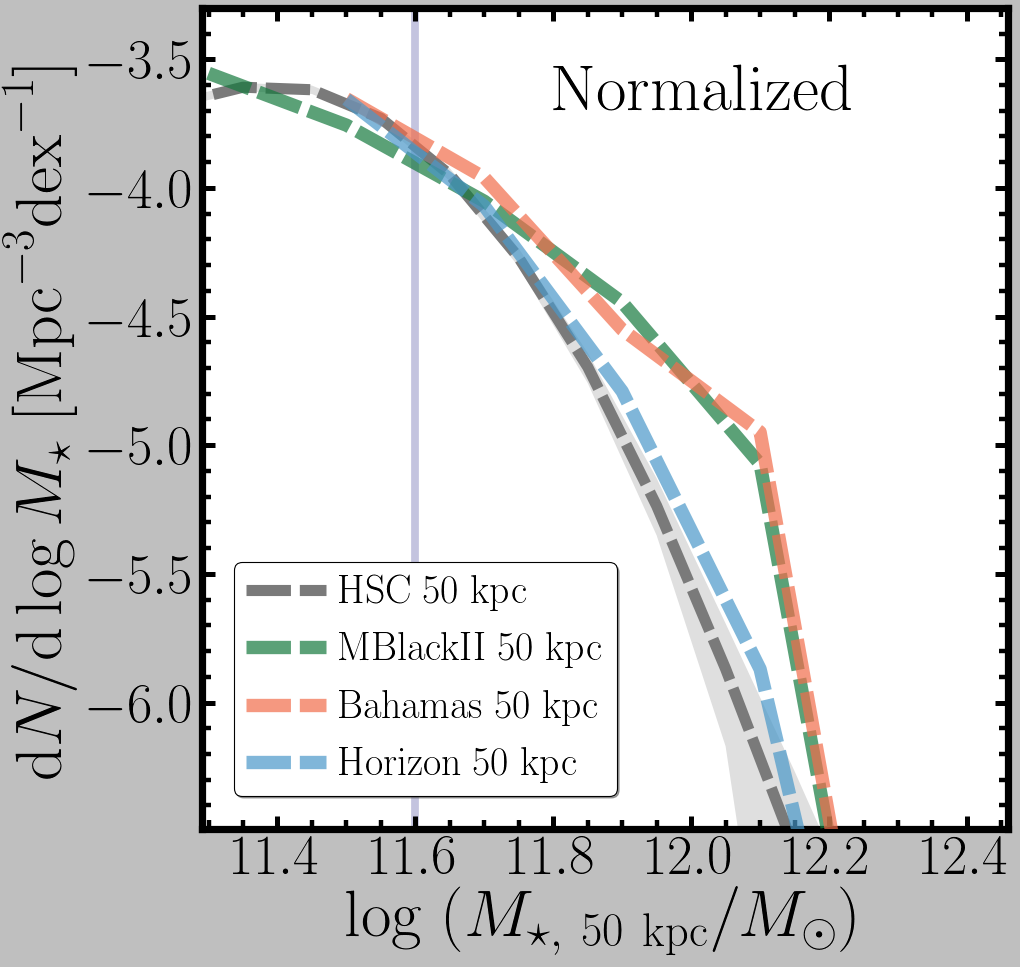

In [48]:
fig = plt.figure(figsize=(13, 12))
fig.subplots_adjust(left=0.22, right=0.995, 
                    bottom=0.14, top=0.995,
                    wspace=0.00, hspace=0.00)

ax1 = fig.add_subplot(111)
ax1 = plotting.songAxisSetup(
    ax1, xlabel=50, ylabel=50, border=6.5,
    xtickFormat='$\mathrm{%4.1f}$', 
    ytickFormat='$\mathrm{%4.1f\ }$')


# S16A
ax1.fill_between(mbin, s16aMLow6, s16aMUpp6, 
                 facecolor=BLK(0.5), 
                 edgecolor='none', alpha=0.3, 
                 zorder=0, rasterized=True)

ax1.plot(mbin, s16aMMed6, c=BLK(0.6), linestyle='--', linewidth=10.0,
         label=r'$\mathrm{HSC}\ \mathrm{50\ kpc}$', 
         zorder=2, rasterized=True, dashes=(40, 8))

# Massive Black II - 100 kpc
ax1.plot(mbinMblack2[4:], rhoMblack2C[4:] + 0.02, c=GRN(0.8), linestyle='--', 
         linewidth=12.0, zorder=5, alpha=0.7,
         label=r'$\mathrm{MBlackII\ 50\ kpc}$', 
         rasterized=True, dashes=(40,8))

# Bahamas - 100 kpc
ax1.plot(mbinBahamas[5:], rhoBahamasC[5:] + 0.06, c=ORG(0.6), linestyle='--', 
         linewidth=12.0, zorder=5, alpha=0.7,
         label=r'$\mathrm{Bahamas\ 50\ kpc}$', 
         rasterized=True, dashes=(40,8))

# Horizon - 100 kpc
ax1.plot(mbinHorizon[5:], rhoHorizonC[5:] - 0.15, c=BLU(0.6), linestyle='--', 
         linewidth=12.0, zorder=5, alpha=0.7,
         label=r'$\mathrm{Horizon\ 50\ kpc}$', 
         rasterized=True, dashes=(40,8))

# Legend
ax1.legend(loc=(0.04, 0.04), shadow=True, fancybox=True, 
           numpoints=1, fontsize=36, scatterpoints=1, 
           markerscale=1.2, borderpad=0.3, handletextpad=0.34)

# X-Y limits
ax1.set_xlim(11.29, 12.459)
ax1.set_ylim(-6.49, -3.3)

# Label
ax1.set_xlabel(r'$\log\ (M_{\star,\ 50\ \mathrm{kpc}}/M_{\odot})$', 
               size=60)
ax1.set_ylabel(r'$\mathrm{d}N/\mathrm{d}\log M_{\star}\ [{\mathrm{Mpc}^{-3}}{\mathrm{dex}^{-1}}]$', 
               size=60)

ax1.text(11.8, -3.7, r'$\mathrm{Normalized}$', size=60)

ax1.axvline(11.6, linestyle='-', linewidth=7.0, c=PUR(0.4), 
            alpha=0.8, zorder=0, rasterized=True)
#ax1.axvline(11.7, linestyle='-', linewidth=4.0, c=PUR(0.5), 
#            alpha=0.8, zorder=0, rasterized=True)

fig.savefig(os.path.join(envir['fig'], 
                         's16a_fastlane_smf_simulation_8.png'), 
            dpi=100)

plt.show()

# Comparing different mass definitions

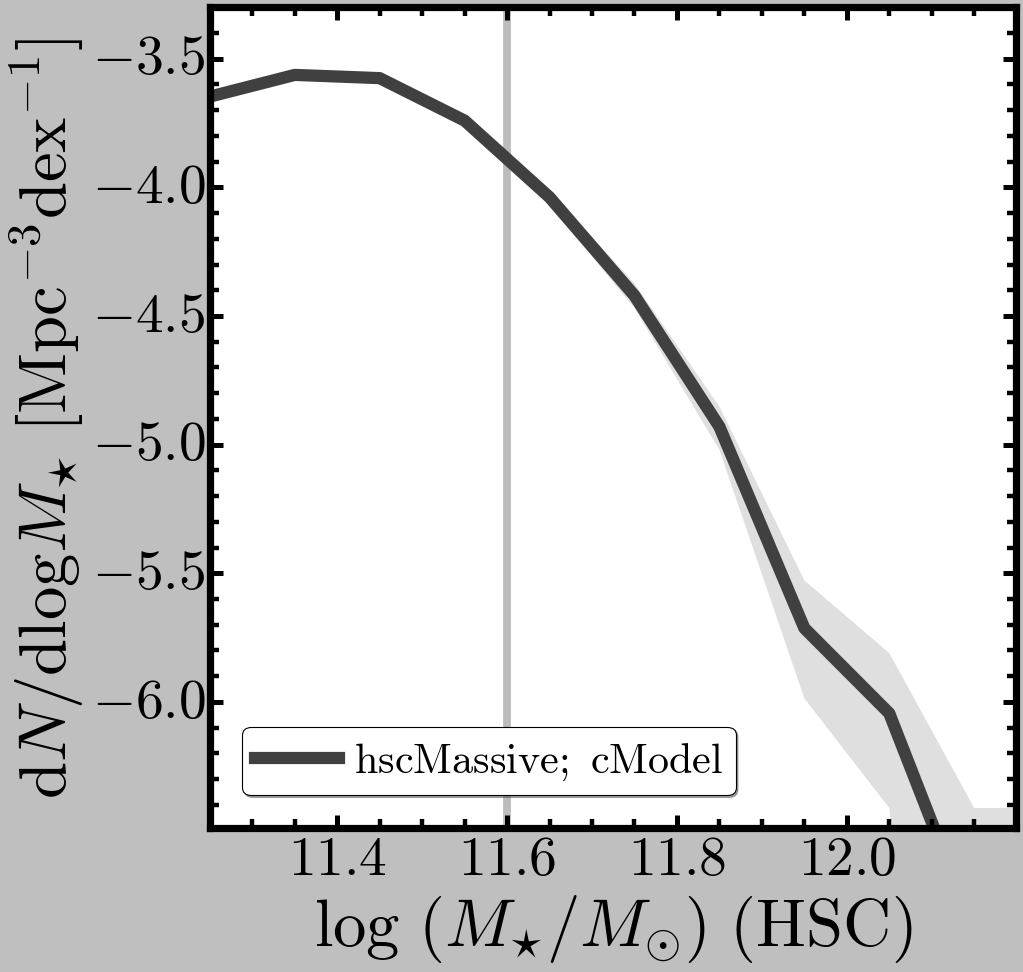

In [40]:
fig = plt.figure(figsize=(13, 12))
fig.subplots_adjust(left=0.22, right=0.995, 
                    bottom=0.14, top=0.995,
                    wspace=0.00, hspace=0.00)

ax1 = fig.add_subplot(111)
ax1 = plotting.songAxisSetup(
    ax1, xlabel=50, ylabel=50, border=6.5,
    xtickFormat='$\mathrm{%4.1f}$', 
    ytickFormat='$\mathrm{%4.1f\ }$')

# S16A
ax1.fill_between(mbin, s16aMLow1, s16aMUpp1, 
                 facecolor=BLK(0.5), 
                 edgecolor='none', alpha=0.3, 
                 zorder=0, rasterized=True)

ax1.plot(mbin, s16aMMed1, c=BLK(0.8), linestyle='-', linewidth=11.0,
         label=r'$\mathrm{hscMassive};\ \mathrm{cModel}$', 
         zorder=2, rasterized=True)

# Legend
ax1.legend(loc=(0.04, 0.04), shadow=True, fancybox=True, 
           numpoints=1, fontsize=38, scatterpoints=1, 
           markerscale=1.2, borderpad=0.3, handletextpad=0.34)

# X-Y limits
ax1.set_xlim(11.25, 12.199)
ax1.set_ylim(-6.49, -3.3)

# Label
ax1.set_xlabel(r'$\log\ (M_{\star}/M_{\odot})\ \mathrm{(HSC)}$', 
               size=60)
ax1.set_ylabel(r'$\mathrm{d}N/\mathrm{d}\logM_{\star}\ [{\mathrm{Mpc}^{-3}}{\mathrm{dex}^{-1}}]$', 
               size=60)

ax1.axvline(11.6, linestyle='-', linewidth=7.0, c=BLK(0.4), 
            alpha=0.9, zorder=0, rasterized=True)

fig.savefig(os.path.join(envir['fig'], 
                         's16a_fastlane_logm_distribution_1.pdf'), 
            dpi=90)

plt.show()

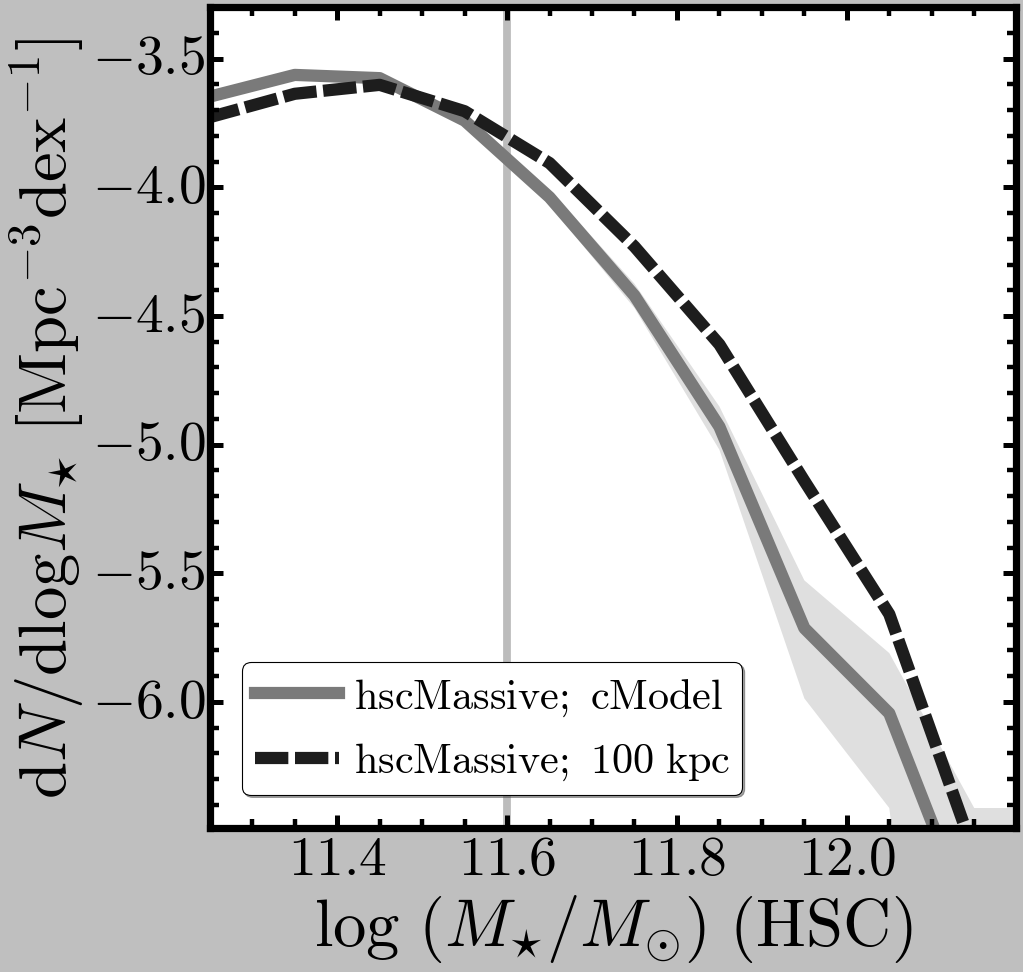

In [41]:
fig = plt.figure(figsize=(13, 12))
fig.subplots_adjust(left=0.22, right=0.995, 
                    bottom=0.14, top=0.995,
                    wspace=0.00, hspace=0.00)

ax1 = fig.add_subplot(111)
ax1 = plotting.songAxisSetup(
    ax1, xlabel=50, ylabel=50, border=6.5,
    xtickFormat='$\mathrm{%4.1f}$', 
    ytickFormat='$\mathrm{%4.1f\ }$')

# S16A: CModel
ax1.fill_between(mbin, s16aMLow1, s16aMUpp1, 
                 facecolor=BLK(0.5), 
                 edgecolor='none', alpha=0.3, 
                 zorder=0, rasterized=True)

ax1.plot(mbin, s16aMMed1, c=BLK(0.6), linestyle='-', linewidth=11.0,
         label=r'$\mathrm{hscMassive};\ \mathrm{cModel}$', 
         zorder=2, rasterized=True)

# S16A: M100 kpc
ax1.plot(mbin, s16aMMed2, c=BLK(0.9), linestyle='--', linewidth=11.0,
         label=r'$\mathrm{hscMassive};\ \mathrm{100\ kpc}$', 
         zorder=2, rasterized=True, dashes=(30, 6))

# Legend
ax1.legend(loc=(0.04, 0.04), shadow=True, fancybox=True, 
           numpoints=1, fontsize=38, scatterpoints=1, 
           markerscale=1.2, borderpad=0.3, handletextpad=0.34)

# X-Y limits
ax1.set_xlim(11.25, 12.199)
ax1.set_ylim(-6.49, -3.3)

# Label
ax1.set_xlabel(r'$\log\ (M_{\star}/M_{\odot})\ \mathrm{(HSC)}$', 
               size=60)
ax1.set_ylabel(r'$\mathrm{d}N/\mathrm{d}\log M_{\star}\ [{\mathrm{Mpc}^{-3}}{\mathrm{dex}^{-1}}]$', 
               size=60)

ax1.axvline(11.6, linestyle='-', linewidth=7.0, c=BLK(0.4), 
            alpha=0.9, zorder=0, rasterized=True)

fig.savefig(os.path.join(envir['fig'], 
                         's16a_fastlane_logm_distribution_2.pdf'), 
            dpi=90)

plt.show()

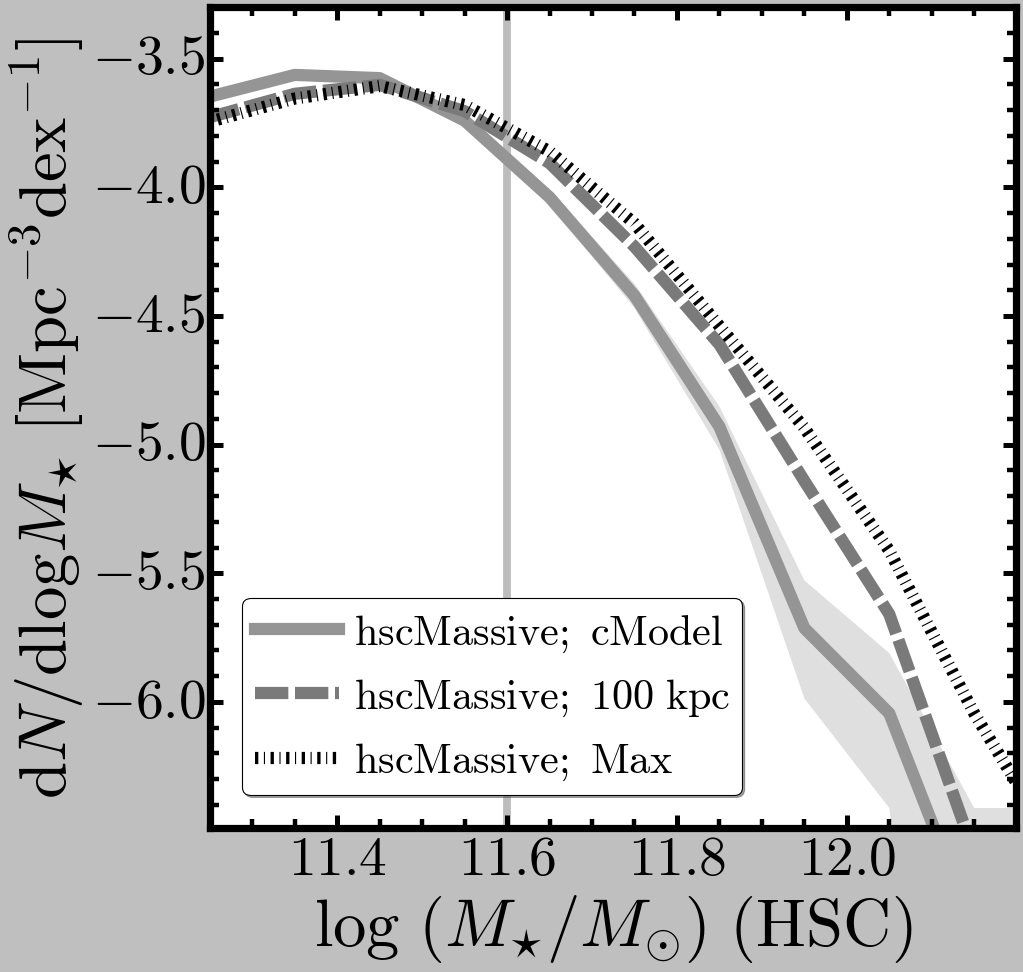

In [42]:
fig = plt.figure(figsize=(13, 12))
fig.subplots_adjust(left=0.22, right=0.995, 
                    bottom=0.14, top=0.995,
                    wspace=0.00, hspace=0.00)

ax1 = fig.add_subplot(111)
ax1 = plotting.songAxisSetup(
    ax1, xlabel=50, ylabel=50, border=6.5,
    xtickFormat='$\mathrm{%4.1f}$', 
    ytickFormat='$\mathrm{%4.1f\ }$')

# S16A: CModel
ax1.fill_between(mbin, s16aMLow1, s16aMUpp1, 
                 facecolor=BLK(0.5), 
                 edgecolor='none', alpha=0.3, 
                 zorder=0, rasterized=True)

ax1.plot(mbin, s16aMMed1, c=BLK(0.5), linestyle='-', linewidth=11.0,
         label=r'$\mathrm{hscMassive};\ \mathrm{cModel}$', 
         zorder=2, rasterized=True)

# S16A: M100 kpc
ax1.plot(mbin, s16aMMed2, c=BLK(0.6), linestyle='--', linewidth=11.0,
         label=r'$\mathrm{hscMassive};\ \mathrm{100\ kpc}$', 
         zorder=2, rasterized=True, dashes=(30, 6))

# S16A: M_Max
ax1.plot(mbin, s16aMMed3, c=BLK(1.0), linestyle='-.', linewidth=11.0,
         label=r'$\mathrm{hscMassive};\ \mathrm{Max}$', 
         zorder=2, rasterized=True)

# Legend
ax1.legend(loc=(0.04, 0.04), shadow=True, fancybox=True, 
           numpoints=1, fontsize=38, scatterpoints=1, 
           markerscale=1.2, borderpad=0.3, handletextpad=0.34)

# X-Y limits
ax1.set_xlim(11.25, 12.199)
ax1.set_ylim(-6.49, -3.3)

# Label
ax1.set_xlabel(r'$\log\ (M_{\star}/M_{\odot})\ \mathrm{(HSC)}$', 
               size=60)
ax1.set_ylabel(r'$\mathrm{d}N/\mathrm{d}\log M_{\star}\ [{\mathrm{Mpc}^{-3}}{\mathrm{dex}^{-1}}]$', 
               size=60)

ax1.axvline(11.6, linestyle='-', linewidth=7.0, c=BLK(0.4), 
            alpha=0.9, zorder=0, rasterized=True)

fig.savefig(os.path.join(envir['fig'], 
                         's16a_fastlane_logm_distribution_3.pdf'), 
            dpi=90)

plt.show()

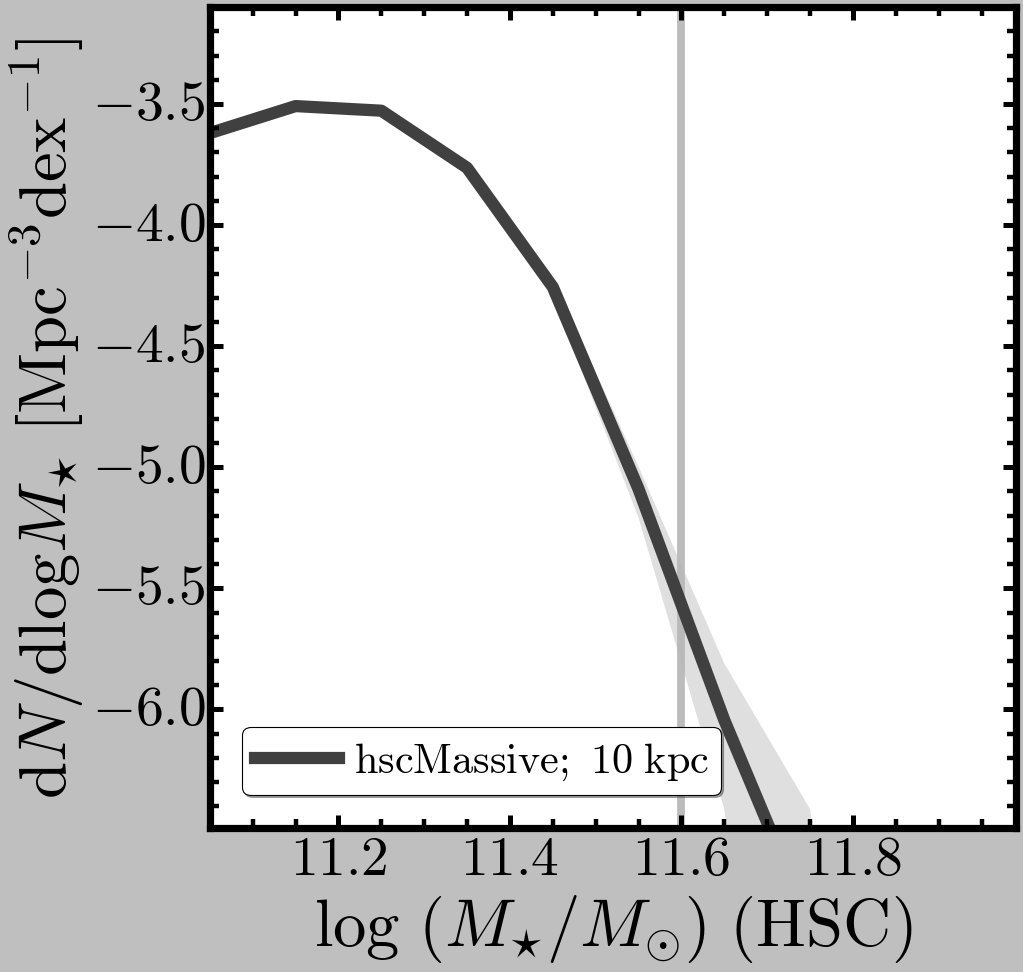

In [43]:
fig = plt.figure(figsize=(13, 12))
fig.subplots_adjust(left=0.22, right=0.995, 
                    bottom=0.14, top=0.995,
                    wspace=0.00, hspace=0.00)

ax1 = fig.add_subplot(111)
ax1 = plotting.songAxisSetup(
    ax1, xlabel=50, ylabel=50, border=6.5,
    xtickFormat='$\mathrm{%4.1f}$', 
    ytickFormat='$\mathrm{%4.1f\ }$')

# S16A
ax1.fill_between(mbin, s16aMLow4, s16aMUpp4, 
                 facecolor=BLK(0.5), 
                 edgecolor='none', alpha=0.3, 
                 zorder=0, rasterized=True)

ax1.plot(mbin, s16aMMed4, c=BLK(0.8), linestyle='-', linewidth=11.0,
         label=r'$\mathrm{hscMassive};\ \mathrm{10\ kpc}$', 
         zorder=2, rasterized=True)

# Legend
ax1.legend(loc=(0.04, 0.04), shadow=True, fancybox=True, 
           numpoints=1, fontsize=38, scatterpoints=1, 
           markerscale=1.2, borderpad=0.3, handletextpad=0.34)

# X-Y limits
ax1.set_xlim(11.05, 11.99)
ax1.set_ylim(-6.49, -3.1)

# Label
ax1.set_xlabel(r'$\log\ (M_{\star}/M_{\odot})\ \mathrm{(HSC)}$', 
               size=60)
ax1.set_ylabel(r'$\mathrm{d}N/\mathrm{d}\logM_{\star}\ [{\mathrm{Mpc}^{-3}}{\mathrm{dex}^{-1}}]$', 
               size=60)

ax1.axvline(11.6, linestyle='-', linewidth=7.0, c=BLK(0.4), 
            alpha=0.9, zorder=0, rasterized=True)

fig.savefig(os.path.join(envir['fig'], 
                         's16a_fastlane_logm_distribution_4.pdf'), 
            dpi=90)

plt.show()

# External Comparisons

In [44]:
"""
### Stellar mass functions from previous works:
"""
ancilDir = envir['ancil']
massCommon = np.arange(7.0, 13.0, 0.1)

mf_M13 = Table.read(os.path.join(ancilDir, 'smf_Moustakas_13.txt'), 
                    format='ascii')

mf_B13 = Table.read(os.path.join(ancilDir, 'smf_Bernardi_13_serExp.txt'), 
                    format='ascii')

mf_B16 = Table.read(os.path.join(ancilDir, 'smf_BernardiMendel_16_serExp.txt'), 
                    format='ascii')

mf_B17 = Table.read(os.path.join(ancilDir, 'smf_Bernardi_17_serExp.txt'), 
                    format='ascii')

mf_D15 = Table.read(os.path.join(ancilDir, 'smf_dSouza_15.txt'), 
                    format='ascii')

mf_T13 = Table.read(os.path.join(ancilDir, 'smf_Tomcsak_13.txt'),
                    format='ascii')

mf_P08 = Table.read(os.path.join(ancilDir, 'smf_PerezGonzalez_08.txt'),
                    format='ascii')

b13A = Table.read(os.path.join(ancilDir, 'bernardi13/MsF_cmodel.dat'), 
                  format='ascii')
b13B = Table.read(os.path.join(ancilDir, 'bernardi13/MsF_SerExp.dat'), 
                  format='ascii')

In [45]:
# Stellar mass function from GAMA (Wright 2017)

logmsGama = 10.78
phi1Gama, alpha1Gama = 2.93E-3, -0.62
phi2Gama, alpha2Gama = 0.63E-3, -1.50

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:39: RuntimeWarning: invalid value encountered in log10


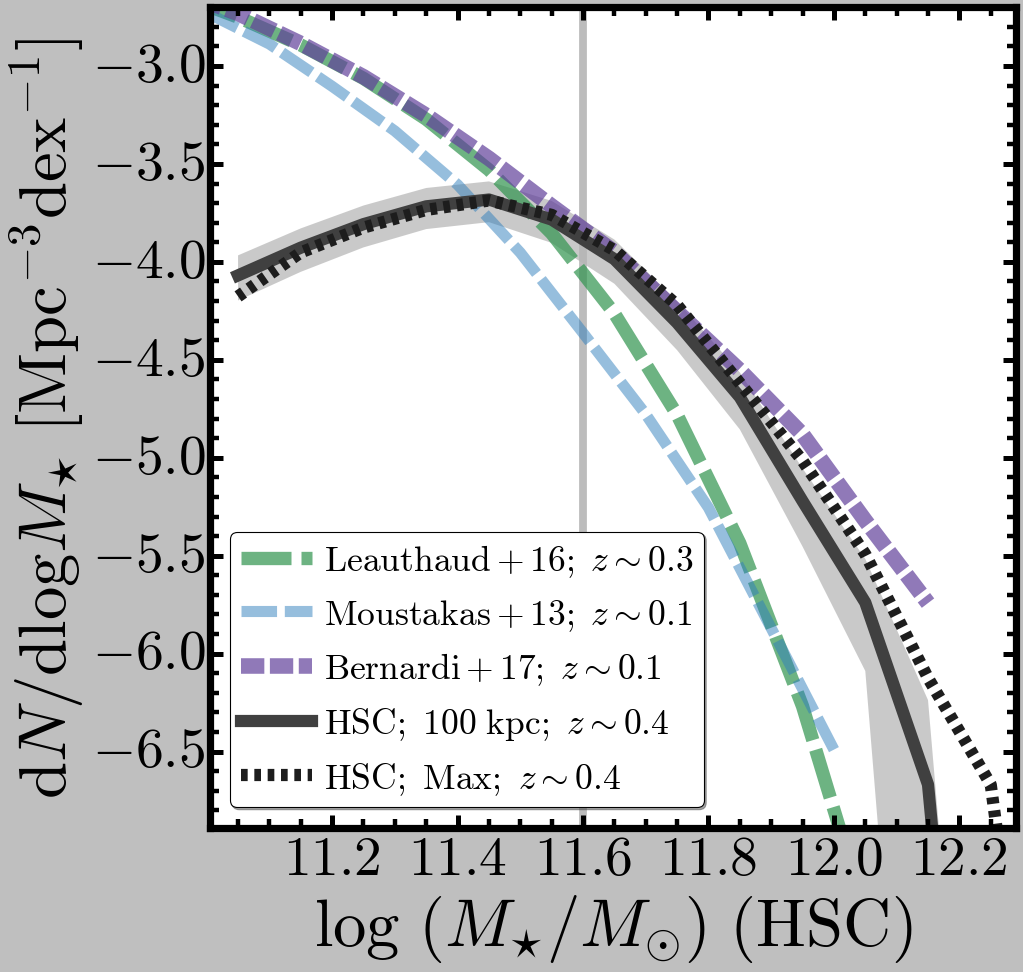

In [62]:
fig = plt.figure(figsize=(13, 12))
fig.subplots_adjust(left=0.22, right=0.995, 
                    bottom=0.14, top=0.995,
                    wspace=0.00, hspace=0.00)

ax1 = fig.add_subplot(111)
ax1 = plotting.songAxisSetup(
    ax1, xlabel=50, ylabel=50, border=6.5,
    xtickFormat='$\mathrm{%4.1f}$', 
    ytickFormat='$\mathrm{%4.1f\ }$')

# Leauthaud+2016
ax1.plot(massCommon + 0.05 , np.log10(mass_function.doubleSchechter(massCommon)), 
         c=GRN(0.7), linestyle='--', dashes=(45,9), linewidth=12.0, alpha=0.7, 
         label=r'$\mathrm{Leauthaud+16;\ }z\sim0.3$')

# Wright+2017
mf_Gama = np.log10(mass_function.doubleSchechter(massCommon, 
                                                 logm0=logmsGama,
                                                 logphi1=np.log10(phi1Gama),
                                                 logphi2=np.log10(phi2Gama),
                                                 alpha1=alpha1Gama,
                                                 alpha2=alpha2Gama))
#ax1.plot(massCommon + 0.07 , mf_Gama, 
#         c=ORG(0.7), linestyle='--', dashes=(20,9), linewidth=12.0, alpha=0.4, 
#         label=r'$\mathrm{Wright+17;\ }z\sim0.1$')

# Moustakas+2013 
ax1.plot(mf_M13['logM'], mf_M13['logPhi'], linestyle='-', 
         linewidth=10.0, alpha=0.5, dashes=(32,7),
         c=BLU(0.7), label=r'$\mathrm{Moustakas+13;\ }z\sim0.1$')

# Bernardi+2013; SerExp
ax1.plot(mf_B17['col1'], mf_B17['col2'] , linestyle='--', 
         linewidth=14.0, alpha=0.7, dashes=(21,5),
         c=PUR(0.8), label=r'$\mathrm{Bernardi+17;\ }z\sim0.1$')

# S16A: M100 kpc
lowSMF = np.log10((10.0 ** s16aMLow2) - (10.0 ** s16aMMed2) * 0.2) - 0.08
uppSMF = np.log10((10.0 ** s16aMUpp2) + (10.0 ** s16aMMed2) * 0.2) - 0.08
lowSMF[~np.isfinite(lowSMF)] = -10.0
ax1.fill_between(mbin[6:], lowSMF[6:], uppSMF[6:], 
                 facecolor=BLK(0.5), 
                 edgecolor='none', alpha=0.5, 
                 zorder=0, rasterized=True)

#ax1.plot(mbin, s16aMMed1, c=BLK(0.8), linestyle='-', linewidth=11.0,
#         label=r'$\mathrm{hscMassive};\ \mathrm{CModel}$', 
#         zorder=2, rasterized=True)

ax1.plot(mbin[6:], s16aMMed2[6:] - 0.08, c=BLK(0.8), linestyle='-', linewidth=11.0,
         label=r'$\mathrm{HSC};\ \mathrm{100\ kpc};\ z\sim0.4$', 
         zorder=2, rasterized=True)

ax1.plot(mbin[6:], s16aMMed3[6:] - 0.08, c=BLK(0.9), linestyle='--', linewidth=11.0,
         label=r'$\mathrm{HSC};\ \mathrm{Max};\ z\sim0.4$', 
         zorder=2, rasterized=True)

ax1.legend(loc=(0.025, 0.025), shadow=True, fancybox=True, 
           numpoints=1, fontsize=32, scatterpoints=1, 
           markerscale=1.2, borderpad=0.3, handletextpad=0.34)

ax1.set_xlim(11.005, 12.29)
ax1.set_ylim(-6.89, -2.7)

# Label
ax1.set_xlabel(r'$\log\ (M_{\star}/M_{\odot})\ \mathrm{(HSC)}$', 
               size=60)
ax1.set_ylabel(r'$\mathrm{d}N/\mathrm{d}\log M_{\star}\ [{\mathrm{Mpc}^{-3}}{\mathrm{dex}^{-1}}]$', 
               size=60)

ax1.axvline(11.6, linestyle='-', linewidth=7.0, c=BLK(0.4), alpha=0.9, zorder=0, 
            rasterized=True)

fig.savefig(os.path.join(envir['fig'], 
                         's16a_fastlane_smf_comparison_1.pdf'), 
            dpi=90)

plt.show()

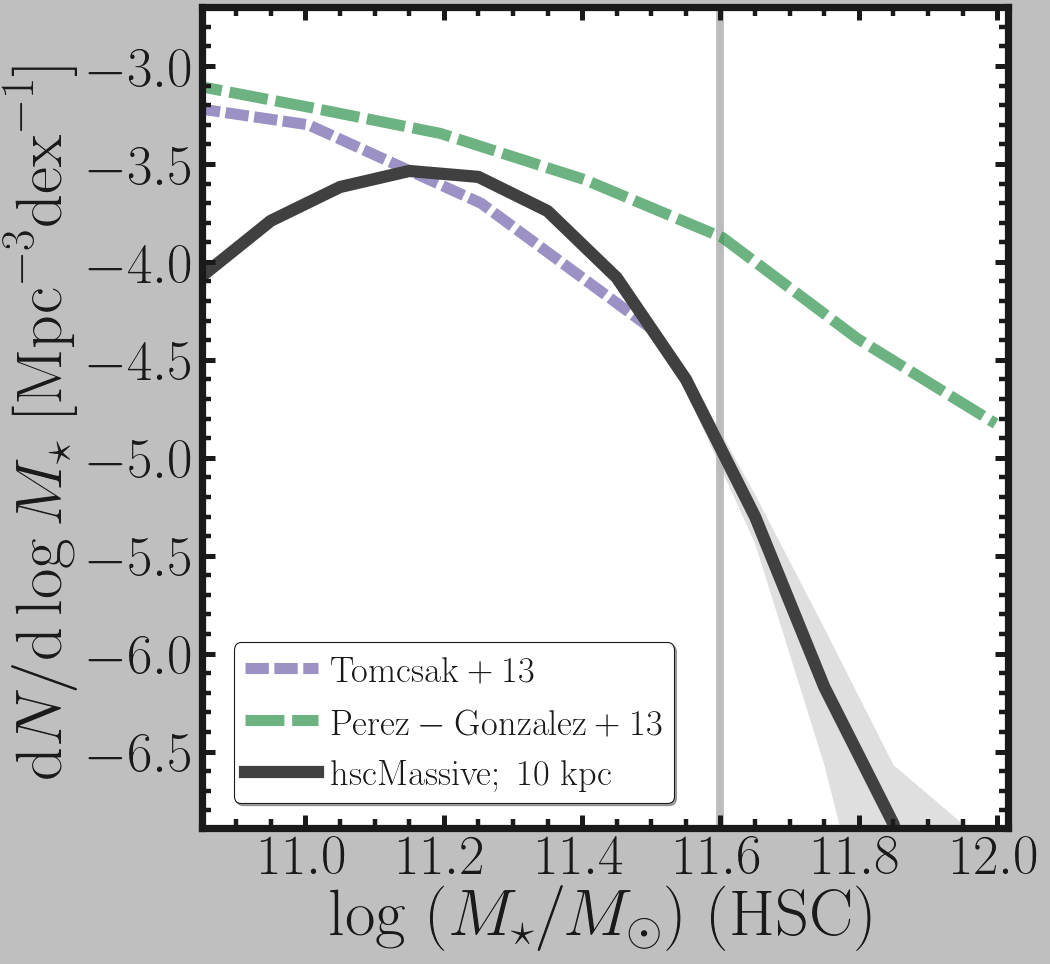

In [106]:
fig = plt.figure(figsize=(13, 12))
fig.subplots_adjust(left=0.22, right=0.995, 
                    bottom=0.14, top=0.995,
                    wspace=0.00, hspace=0.00)

ax1 = fig.add_subplot(111)
ax1 = plotting.songAxisSetup(
    ax1, xlabel=50, ylabel=50, border=6.5,
    xtickFormat='$\mathrm{%4.1f}$', 
    ytickFormat='$\mathrm{%4.1f\ }$')

# z~2: Tomcsak+13
ax1.plot(mf_T13['col1'], mf_T13['col2'], linestyle='--', 
         linewidth=10.0, alpha=0.7, dashes=(21,5),
         c=PUR(0.7), label=r'$\mathrm{Tomcsak+13}$')

# z~2: Perez-Gonzalez+08
ax1.plot(mf_P08['col1'], mf_P08['col2'], linestyle='--', 
         linewidth=10.0, alpha=0.7, dashes=(35,7),
         c=GRN(0.7), label=r'$\mathrm{Perez-Gonzalez+13}$')

# S16A: M100 kpc
ax1.fill_between(mbin, s16aMLow4, s16aMUpp4, 
                 facecolor=BLK(0.5), 
                 edgecolor='none', alpha=0.3, 
                 zorder=0, rasterized=True)

ax1.plot(mbin, s16aMMed4, c=BLK(0.8), linestyle='-', linewidth=11.0,
         label=r'$\mathrm{hscMassive};\ \mathrm{10\ kpc}$', 
         zorder=2, rasterized=True)

ax1.legend(loc=(0.04, 0.03), shadow=True, fancybox=True, 
           numpoints=1, fontsize=33, scatterpoints=1, 
           markerscale=1.2, borderpad=0.3, handletextpad=0.34)

ax1.set_xlim(10.85, 12.015)
ax1.set_ylim(-6.89, -2.7)

# Label
ax1.set_xlabel(r'$\log\ (M_{\star}/M_{\odot})\ \mathrm{(HSC)}$', 
               size=60)
ax1.set_ylabel(r'$\mathrm{d}N/\mathrm{d}\log M_{\star}\ [{\mathrm{Mpc}^{-3}}{\mathrm{dex}^{-1}}]$', 
               size=60)

ax1.axvline(11.6, linestyle='-', linewidth=7.0, c=BLK(0.4), alpha=0.9, zorder=0, 
            rasterized=True)

fig.savefig(os.path.join(envir['fig'], 
                         's16a_fastlane_smf_comparison_2.pdf'), 
            dpi=90)

plt.show()